# Preprocessing

$Name:Maryam Khodabakhshloo$
    
$Gmail:khodabakhshloo1995@gmail.com$
<img scr='Maryam.jpg' >

- **Libraries**

In [2]:
from matplotlib import pyplot as plt
import time
import numpy as np
import datetime
import pandas as pd
from datetime import datetime

- Classify **US-101**

In [ ]:
infile='/home/m/Desktop/Simulation.csv'
outfile='/home/m/Desktop/us-101.csv'
with open(infile,'r') as f ,open(outfile,'w') as o:
    for line in f:
        if 'us-101' in line:
            o.write(line)

- Classify **I-80**

In [ ]:
infile='/home/m/Desktop/Simulation.csv'
outfile='/home/m/Desktop/I-80.csv'
with open(infile,'r') as f ,open(outfile,'w') as o:
    for line in f:
        if 'i-80' in line:
            o.write(line)

- **Number of I-80 Dataset**

In [ ]:
with open('/home/m/Desktop/NGSIM/original/I-80.csv') as f:
    add=sum(1 for line in f)
    print(add)

- **Number of us-101 Dataset**

In [ ]:
with open('/home/m/Desktop/NGSIM/original/us-101.csv') as f:
    add=sum(1 for line in f)
    print(add)

- **Preprocessing**

In [3]:
path='/home/m/Desktop/NGSIM/original/us-101.csv'
df=pd.read_csv(path)

- Delete some column & convert inch to meter & convert unix timestamp to datetime

- The timestamp is the number of seconds from 00:00:00 on January 1, 1970 to the present day
- https://www.code-learner.com/how-to-convert-timestamp-to-specified-format-date-string-in-python3/
- https://en.wikipedia.org/wiki/Unix_time

In [4]:
df.columns = ['Vehicle_ID', 'Frame_ID', 'Total_Frames', 'Global_Time', 'Local_X', 'Local_Y', 'Global_X',
              'Global_Y', 'v_length', 'v_Width', 'v_Class', 'v_Vel', 'v_Acc', 'Lane_ID', 'O_Zone', 'D_Zone',
              'Int_ID', 'Section_ID', 'Direction', 'Movement', 'Preceding', 'Following', 'Space_Headway',
              'Time_Headway', 'Location']
df.drop(df[df.Lane_ID > 5].index, inplace=True)
df.drop(df[df.v_Class ==1 ].index, inplace=True)
df.drop(df[df.v_Class ==3 ].index, inplace=True)
#df.drop('v_Class',axis=1,inplace=True)
df.drop('O_Zone',axis=1,inplace=True)
df.drop('D_Zone',axis=1,inplace=True)
df.drop('Int_ID',axis=1,inplace=True)
df.drop('Section_ID',axis=1,inplace=True)
df.drop('Direction',axis=1,inplace=True)
df.drop('Movement',axis=1,inplace=True)
df.drop('Preceding',axis=1,inplace=True)
df.drop('Following',axis=1,inplace=True)
df.drop('Space_Headway',axis=1,inplace=True)
df.drop('Time_Headway',axis=1,inplace=True)
df.drop('Location',axis=1,inplace=True)
df.drop('Global_X',axis=1,inplace=True)
df.drop('Global_Y',axis=1,inplace=True)
df["Local_X"] = 0.3048 * df["Local_X"]
df["Local_Y"] = 0.3048 * df["Local_Y"]
df["v_length"] = 0.3048 * df["v_length"]
df["v_Width"] = 0.3048 * df["v_Width"]
df["v_Vel"] = 0.3048 * df["v_Vel"]
df["v_Acc"] = 0.3048 * df["v_Acc"]
df['Global_Time']=pd.to_datetime(df['Global_Time'],unit='ms')
df['Global_Time']=df['Global_Time'].dt.strftime('%H:%M:%S:%f')
df

,Vehicle_ID,Frame_ID,Total_Frames,Global_Time,Local_X,Local_Y,v_length,v_Width,v_Class,v_Vel,v_Acc,Lane_ID
0,2127,6459,567,15:00:24:800000,5.983834,541.207147,4.1148,2.10312,2,11.436096,3.413760,2
1,1033,4827,592,15:12:04:700000,1.890370,518.508691,4.1148,1.34112,2,12.798552,0.030480,1
3,744,3392,996,15:09:41:200000,8.802014,149.378213,4.5720,1.79832,2,7.479792,-0.012192,3
4,496,2766,771,15:08:38:600000,15.892577,504.887179,4.5720,1.49352,2,9.933432,-2.112264,5
5,946,4104,676,15:10:52:400000,1.637690,111.501631,3.9624,1.34112,2,6.909816,0.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...
4098927,1741,7118,1043,15:15:53:800000,5.673547,438.649262,3.9624,1.49352,2,6.096000,0.000000,2
4098928,601,1871,459,14:52:46:000000,16.683228,606.089314,5.4864,2.25552,2,17.614392,0.310896,5
4098929,1752,6989,1039,15:15:40:900000,6.205728,387.508090,5.0292,1.79832,2,3.645408,-0.731520,2
4098930,2634,8057,690,15:03:04:600000,12.457481,492.873792,4.4196,1.95072,2,7.620000,-0.012192,4


In [5]:
print(df['Local_Y'].max(),df['Local_Y'].min())

681.3048096 0.0


In [5]:
grouped1 = df.groupby(['Global_Time'])
print(len(grouped1))

27726


In [6]:
Number_Vehicles_each_time=[]
for group in grouped1:
    Number_Vehicles_each_time.append(group)

In [7]:
times=[]
count=0
for i in Number_Vehicles_each_time:
    if len(Number_Vehicles_each_time[count][1])>2:
        times.append(i)
    count=count+1
    
print(len(times))

27674


In [8]:
times[0]

('14:49:41:100000',
          Vehicle_ID  Frame_ID  Total_Frames      Global_Time    Local_X  \
 1582086          13        22           432  14:49:41:100000   4.917338   
 3575336           5        22           452  14:49:41:100000  12.053011   
 3664617           2        22           437  14:49:41:100000   4.962754   
 
            Local_Y  v_length  v_Width  v_Class      v_Vel     v_Acc  Lane_ID  
 1582086  10.924642    4.8768  1.49352        2  11.201400  0.000000        2  
 3575336  28.856940    5.1816  2.40792        2  11.634216  1.624584        4  
 3664617  21.762110    4.4196  1.49352        2  12.170664 -0.496824        2  )

In [9]:
number_of_cars_in_each_timeframe=[]
count=0
for i in times:
    c=len(times[count][1])
    number_of_cars_in_each_timeframe.append(c)
    count=count+1
print(max(number_of_cars_in_each_timeframe),min(number_of_cars_in_each_timeframe))

208 3


# Figure

########################  time :  14:49:41:100000   ##############################
enter somthing 


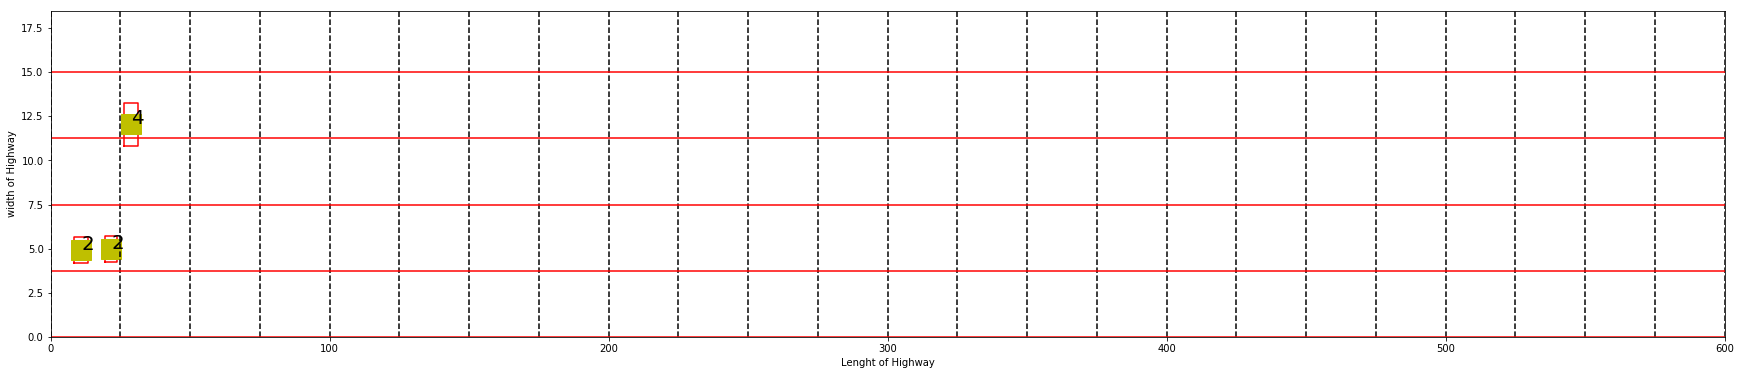

########################  time :  14:49:41:200000   ##############################
enter somthing 


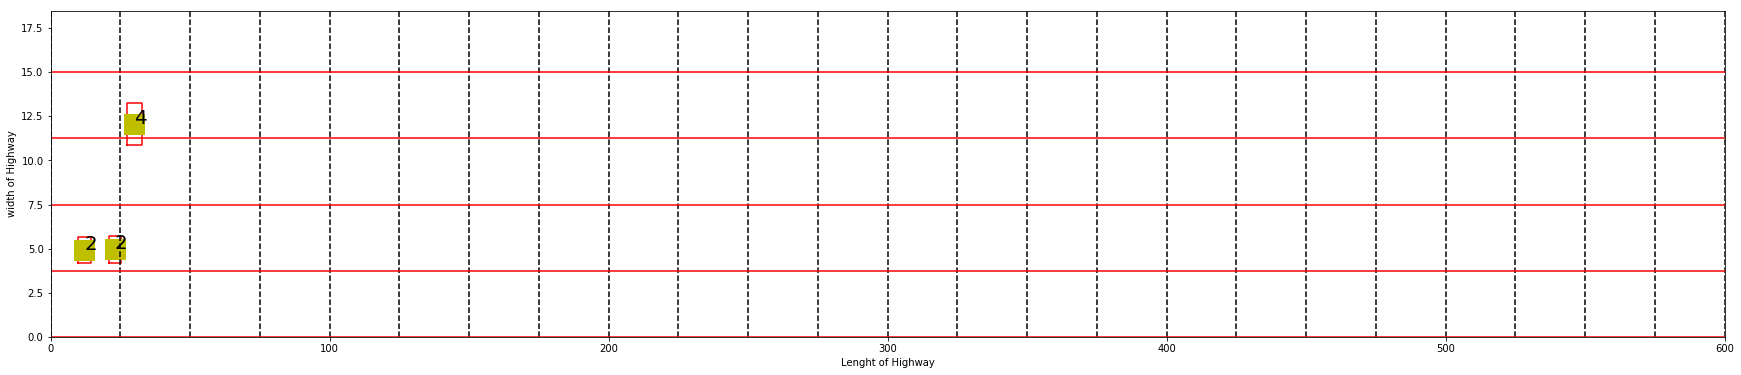

########################  time :  14:49:41:300000   ##############################
enter somthing 


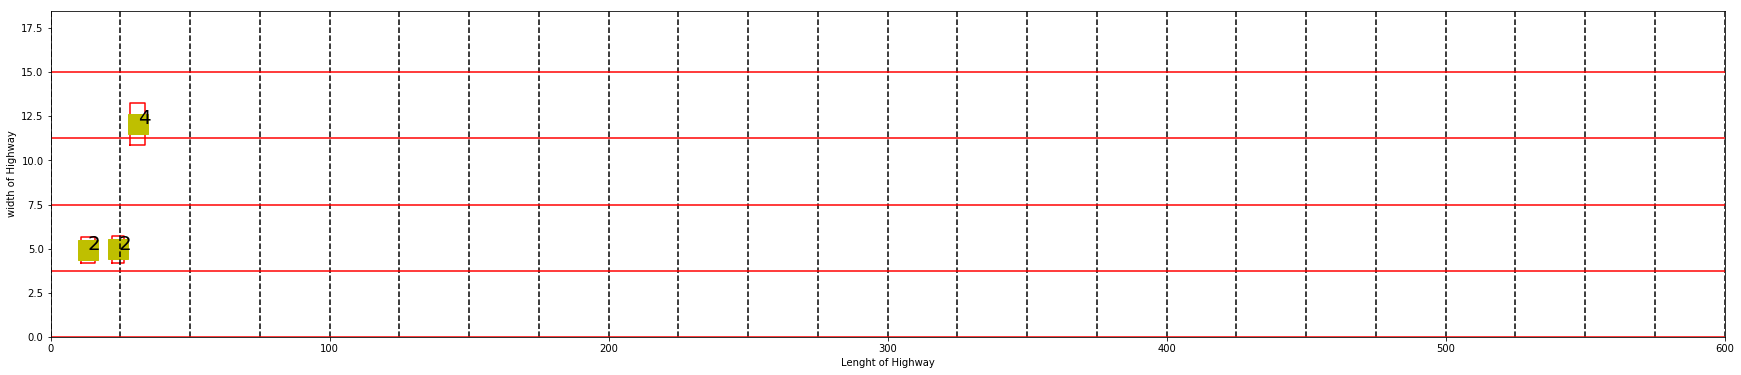

########################  time :  14:49:41:400000   ##############################
enter somthing 


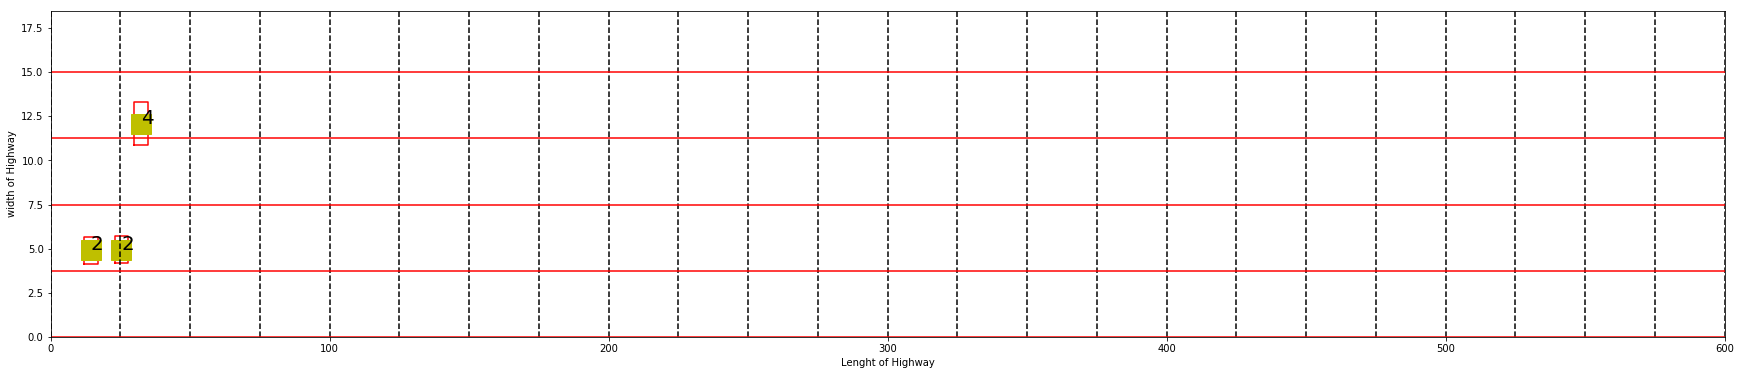

########################  time :  14:49:41:500000   ##############################
enter somthing 


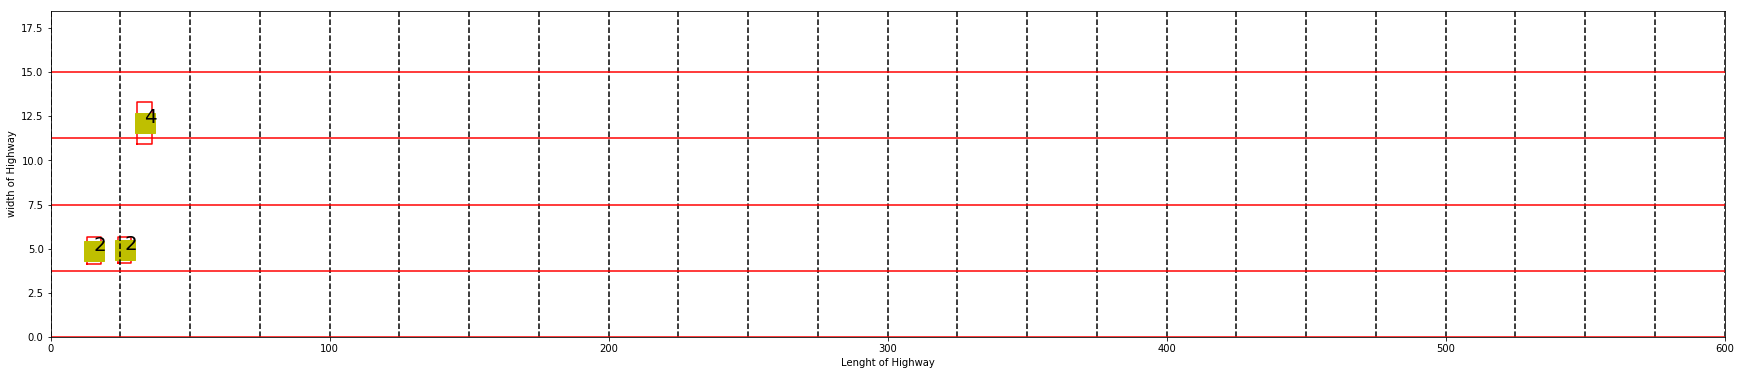

########################  time :  14:49:41:600000   ##############################
enter somthing finish


In [10]:
def plott(item):
    y   = item[1][5]
    x   = item[1][4]
    l   = item[1][6]
    w   = item[1][7]
    i_d = item[1][0]
    t_f = item[1][2]
    v_c = item[1][8]
    f_i = item[1][2]
    l_i = item[1][11]
    
    
    plt.xlim(0,600)
    plt.ylim(0,18.5)
    #fig.suptitle('US-101')
    plt.xlabel('Lenght of Highway')
    plt.ylabel('width of Highway')
    plt.plot([y-l/2, y+l/2, y+l/2, y-l/2,y-l/2],[x-w/2, x-w/2, x+w/2, x+w/2,x-w/2],'r')
    plt.text(y, x, str(l_i), fontsize=20)
    plt.plot(y,x,marker="s",markersize=20,c='y')

    #plt.text(x, y, str((i_d,t_f)), fontsize=12)
    
    
for cars in times:
    cars[1].reset_index(inplace=True,drop=True)
    print("########################  time : ",cars[0],"  ##############################")
    #print('########################  time  ##############################',cars[1])


    a=input("enter somthing ")
    if a=="finish":
        break



    #time.sleep(.1)
    #print(cars[0])
    #print(cars[1])
    #print(type(cars[1]))
    fig = plt.figure(figsize=(30, 6))
    for row in cars[1].iterrows():
        #print(row)
        #print(type(row))
        #print(len(row))
        #print(row[1])
        plott(row)
    #fig = plt.figure(figsize=(20, 6))
    #fig.title('US-101')
    xposition = np.arange(0, 650, 25).tolist()
    for xc in xposition:
        plt.axvline(x=xc, color='k', linestyle='--')
    yposition = np.arange(0, 19, 3.75).tolist()
    for yc in yposition:
        plt.axhline(y=yc, color='r', linestyle='-')
        
        
        
    plt.show()

                                     time :  15:02:23:100000                                      


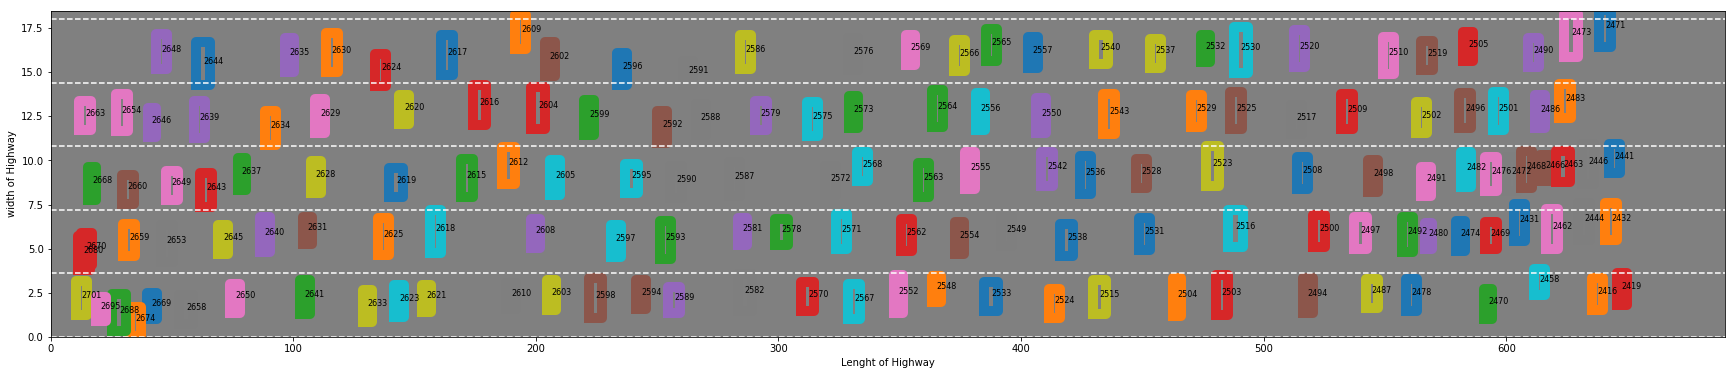

                                     time :  15:02:24:100000                                      


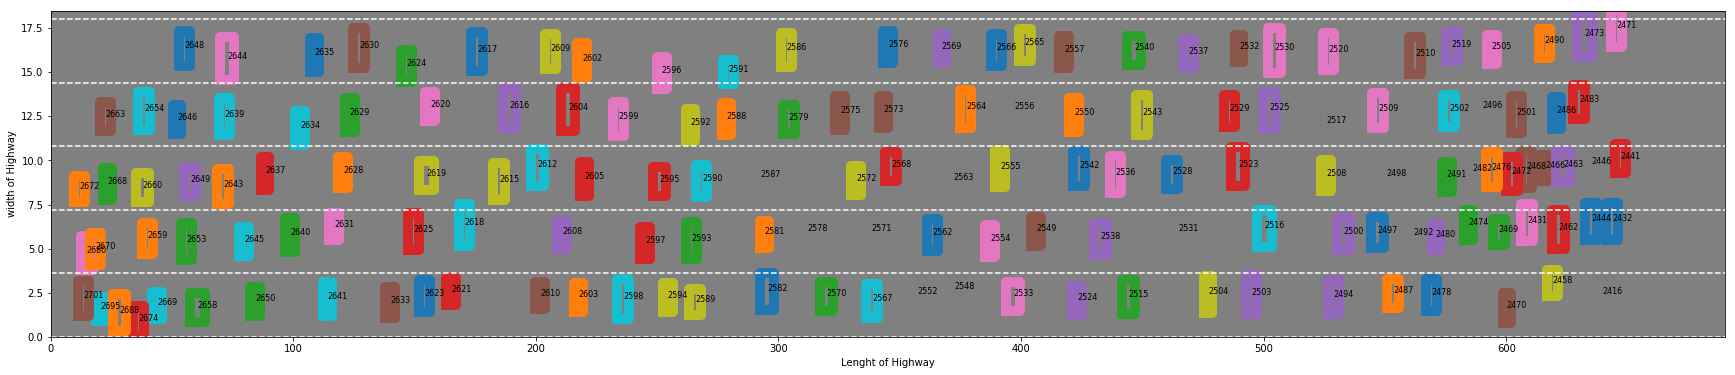

                                     time :  15:02:26:100000                                      


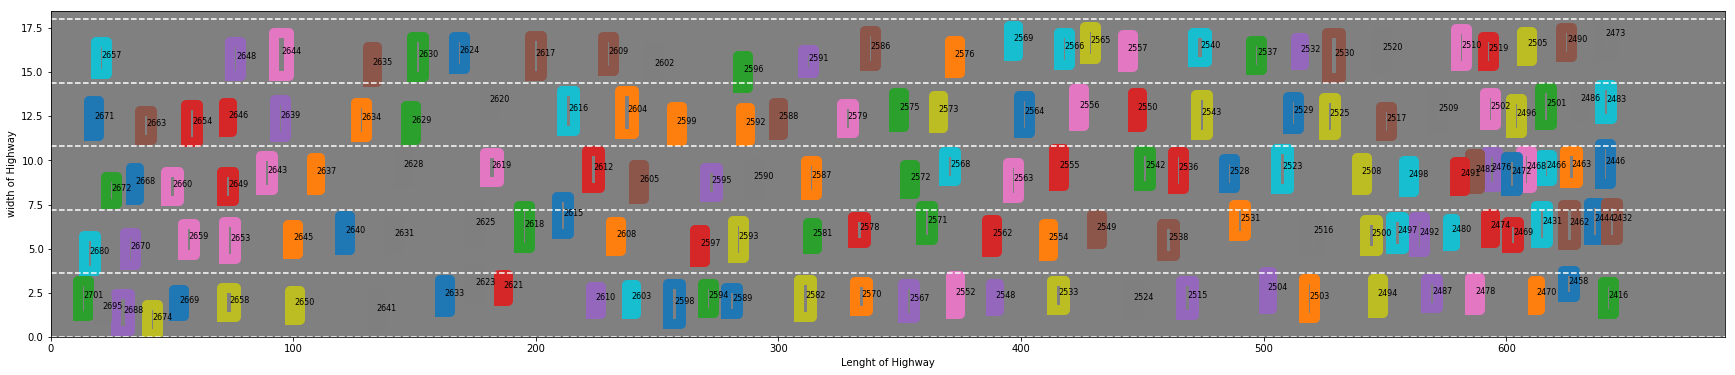

                                     time :  15:02:27:100000                                      


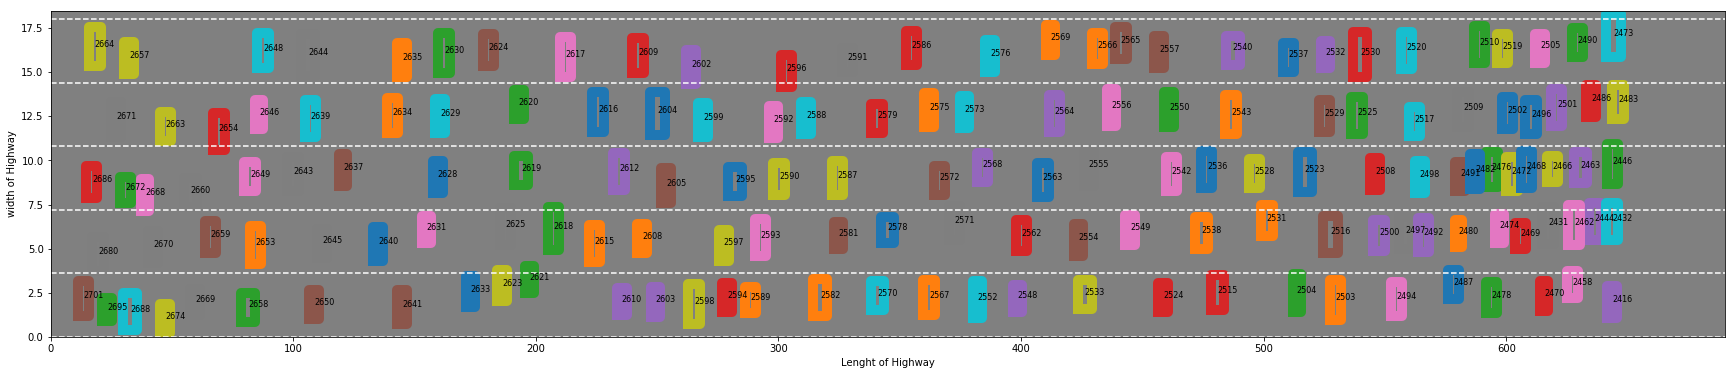

                                     time :  15:02:28:100000                                      


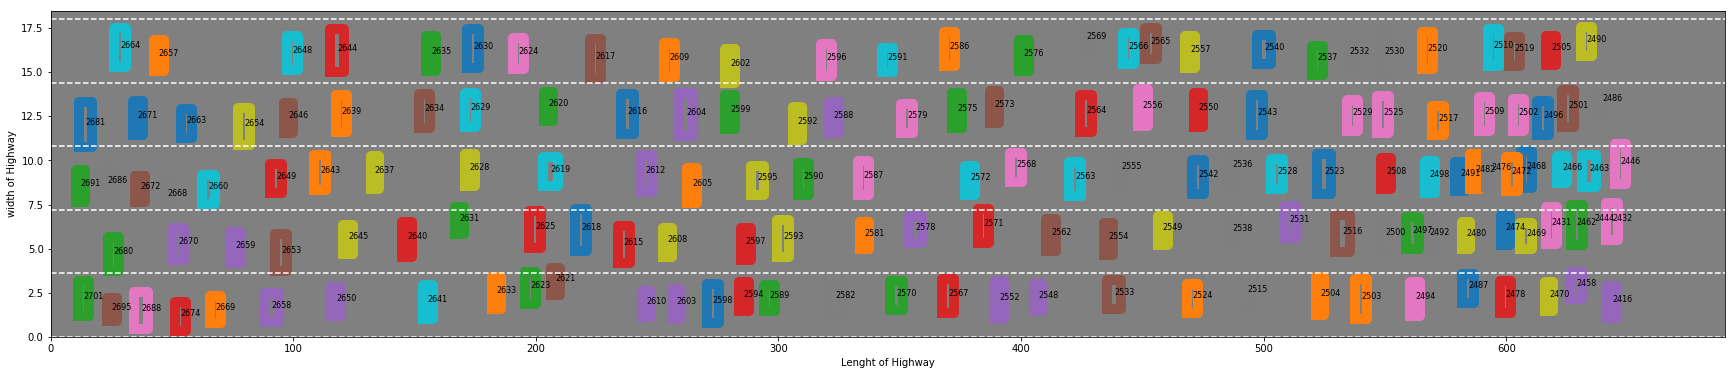

                                     time :  15:02:29:100000                                      


KeyboardInterrupt: 

In [9]:
def plott(item):
    y   = item[1][5]
    x   = item[1][4]
    l   = item[1][6]
    w   = item[1][7]
    i_d = item[1][0]
    t_f = item[1][2]
    v_c = item[1][8]
    f_i = item[1][2]
    l_i = item[1][11]
    
    plt.xlim(0,690)
    plt.ylim(0,18.5)
    #fig.suptitle('US-101')
    plt.xlabel('Lenght of Highway')
    plt.ylabel('width of Highway')
    plt.plot([y-l/2, y+l/2, y+l/2, y-l/2,y-l/2],[x-w/2, x-w/2, x+w/2, x+w/2,x-w/2],linewidth=10)
    plt.text(y, x, str(i_d), fontsize=8)
    #plt.plot(y,x,marker="s",markersize=20,c='y')
    #plt.text(x, y, str((i_d,t_f)), fontsize=12)
counter=0    
for cars in times:
    if counter % 10 != 0:
        counter=counter+1
        continue
    else:
        cars[1].reset_index(inplace=True,drop=True)
        #print("                                     time : ",cars[0],"                                     ")
        if len(cars[1])>150:
            print("                                     time : ",cars[0],"                                     ")
            #print('########################  time  ##############################',cars[1])

            #time.sleep(.1)
            #print(cars[0])
            #print(cars[1])
            #print(type(cars[1]))
            fig = plt.figure(figsize=(30, 6))
            plt.rcParams['axes.facecolor'] = 'gray'
            for row in cars[1].iterrows():
                #print(row)
                #print(type(row))
                #print(len(row))
                #print(row[1])
                plott(row)
            #fig = plt.figure(figsize=(20, 6))
            #fig.title('US-101')
            
#             xposition = np.arange(0, 670, 100).tolist()
#             for xc in xposition:
#                 plt.axvline(x=xc, color='k', linestyle='-')
            yposition = np.arange(0, 19, 3.6).tolist()
            for yc in yposition:
                plt.axhline(y=yc, color='white', linestyle='--')
            plt.show()
    counter=counter+1
   
    

1,2 
1,2,3 
2,3,4 
3,4,5 
4,5
########################  time :  14:49:41:100000   ##############################


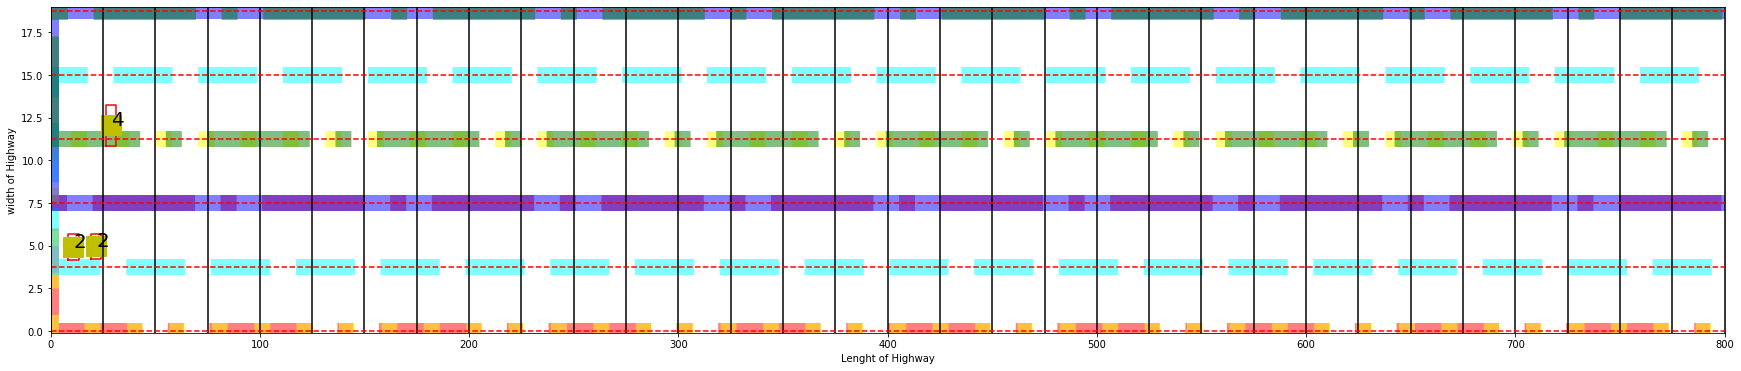

########################  time :  14:49:41:200000   ##############################


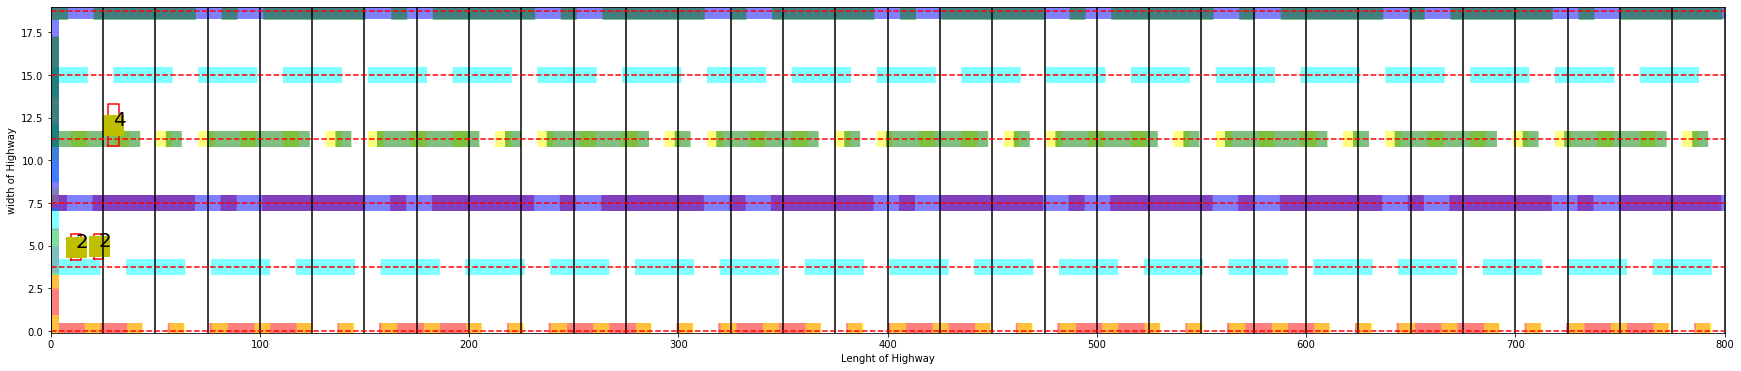

########################  time :  14:49:41:300000   ##############################


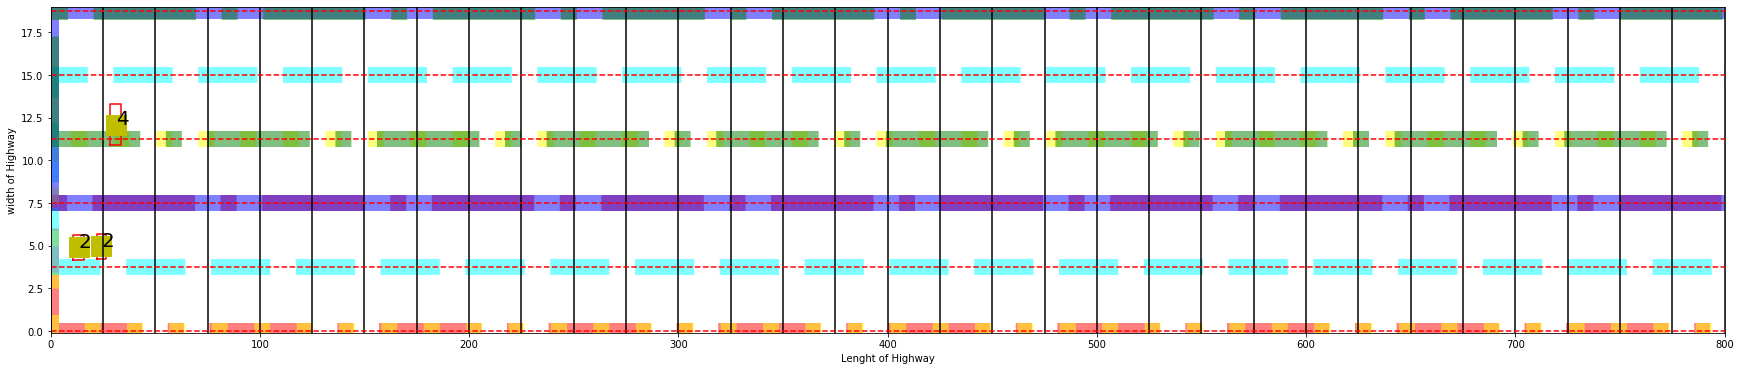

########################  time :  14:49:41:400000   ##############################


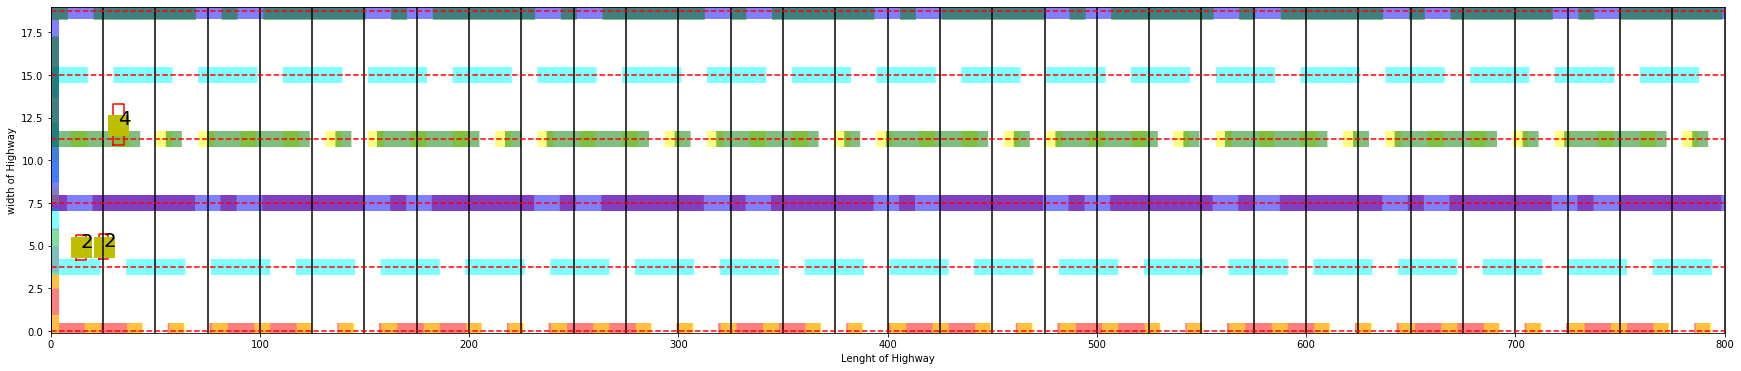

########################  time :  14:49:41:500000   ##############################


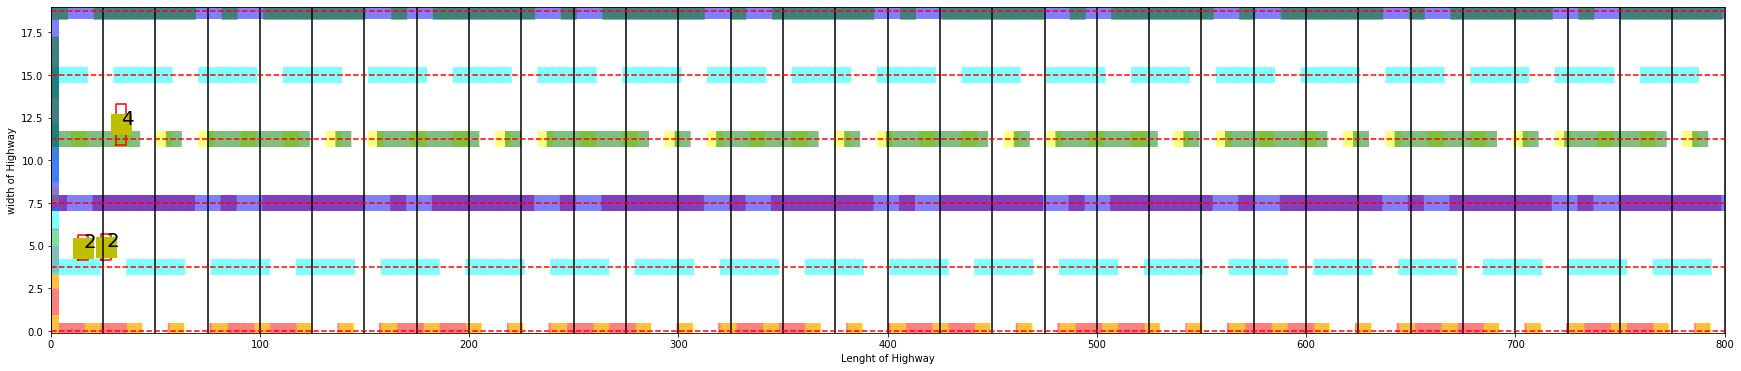

########################  time :  14:49:41:600000   ##############################


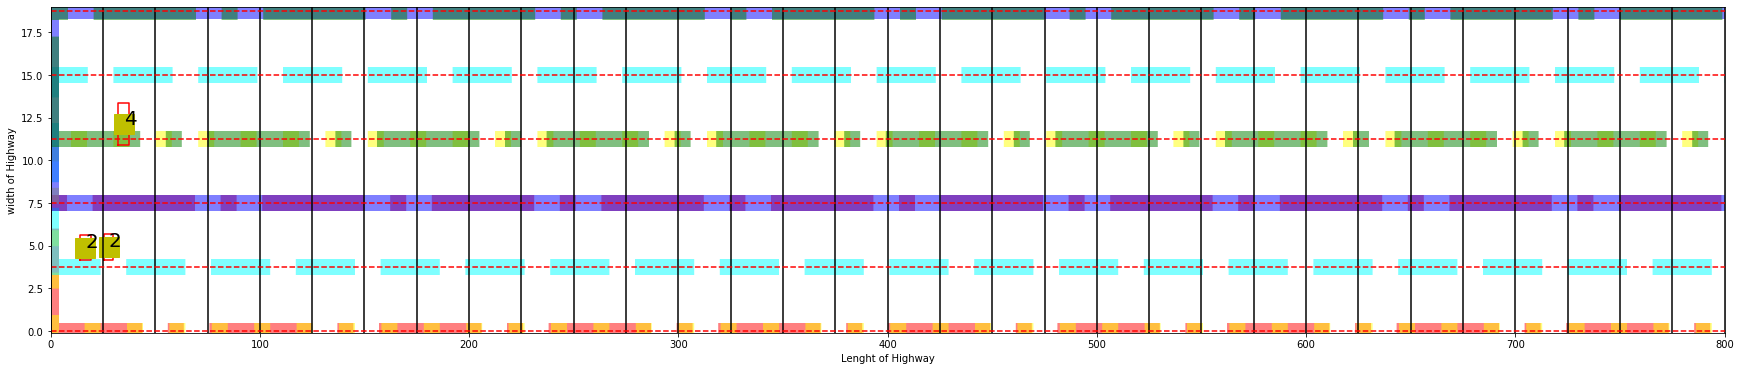

########################  time :  14:49:41:700000   ##############################


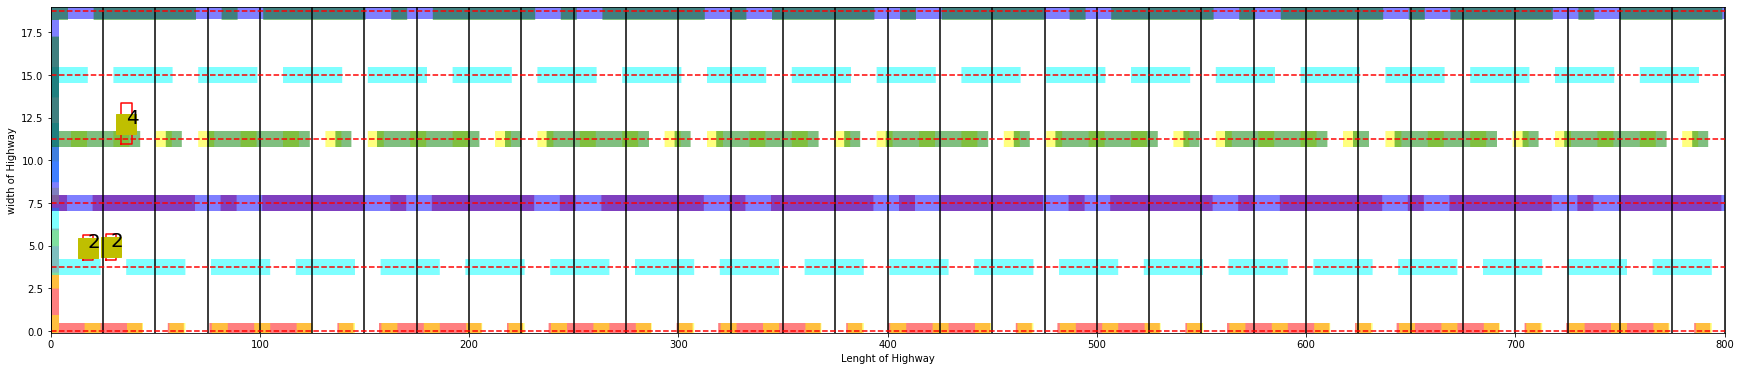

########################  time :  14:49:41:800000   ##############################


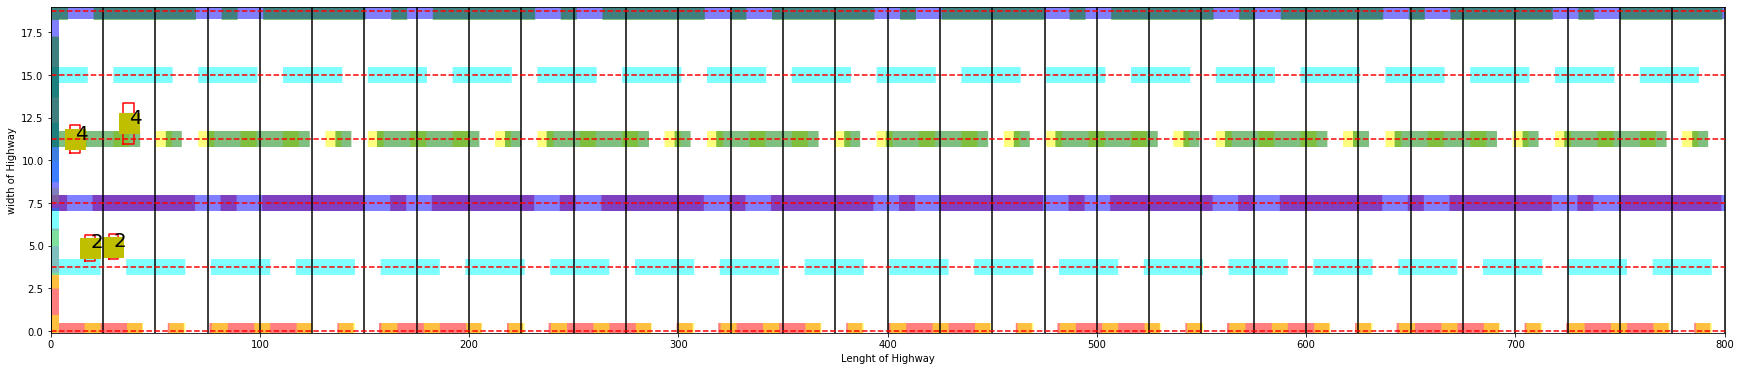

########################  time :  14:49:41:900000   ##############################


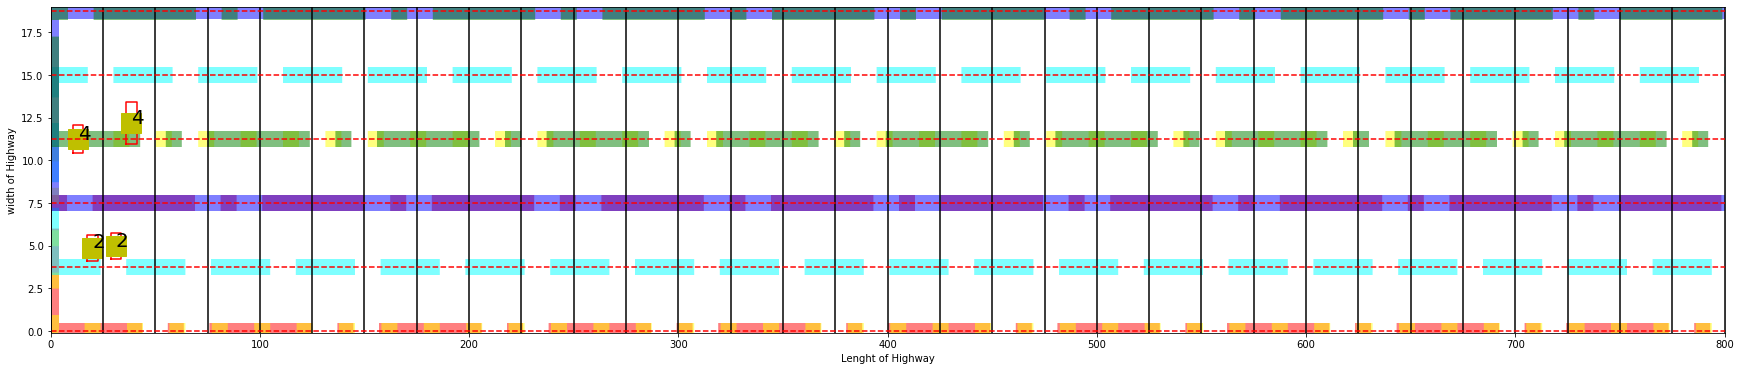

########################  time :  14:49:42:000000   ##############################


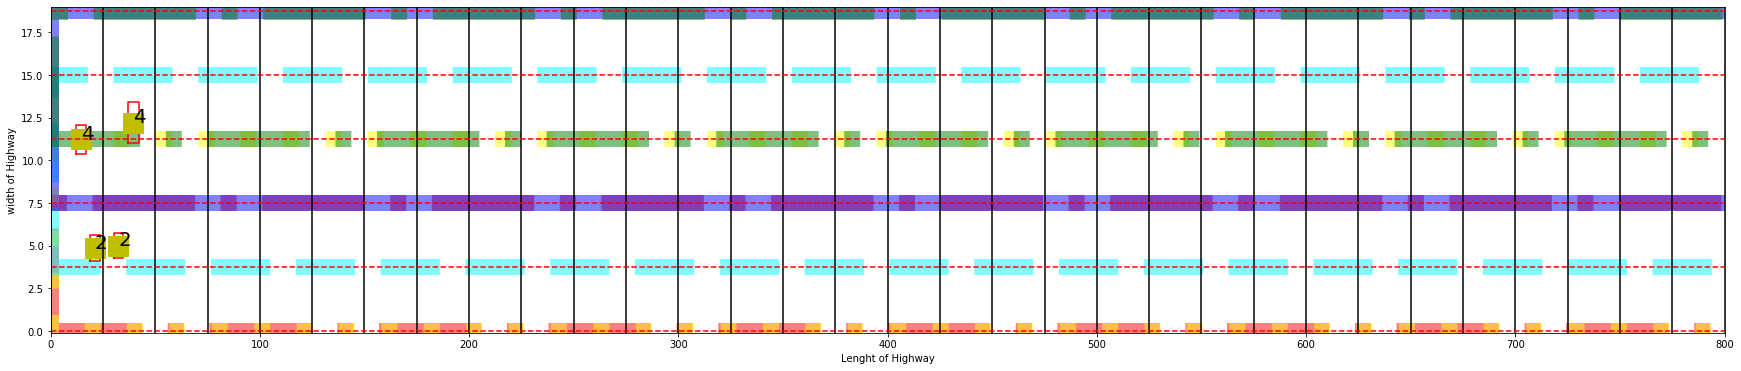

########################  time :  14:49:42:100000   ##############################


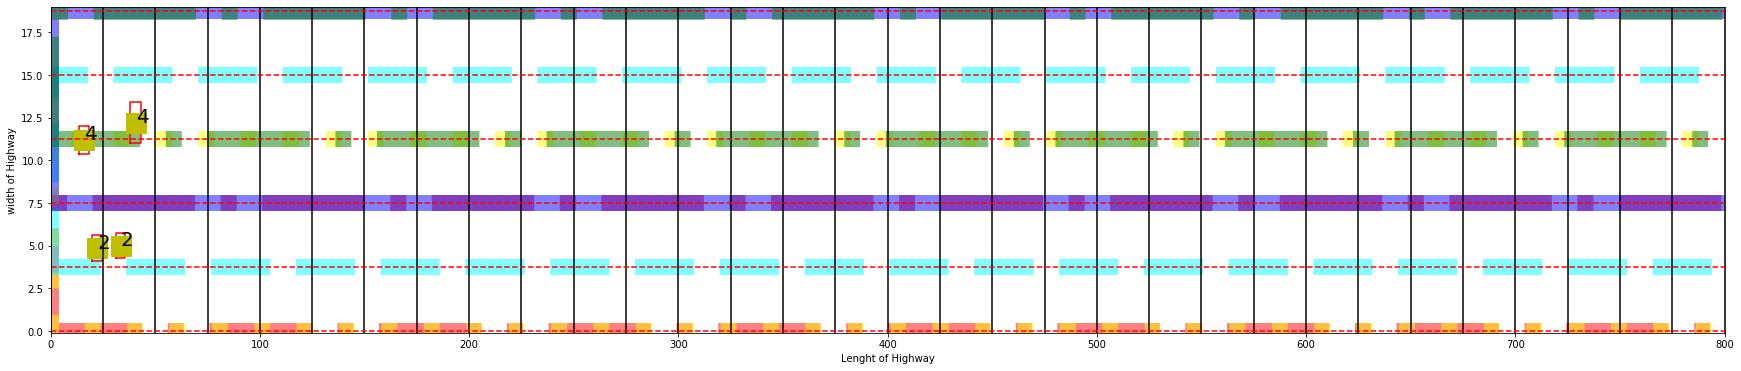

########################  time :  14:49:42:200000   ##############################


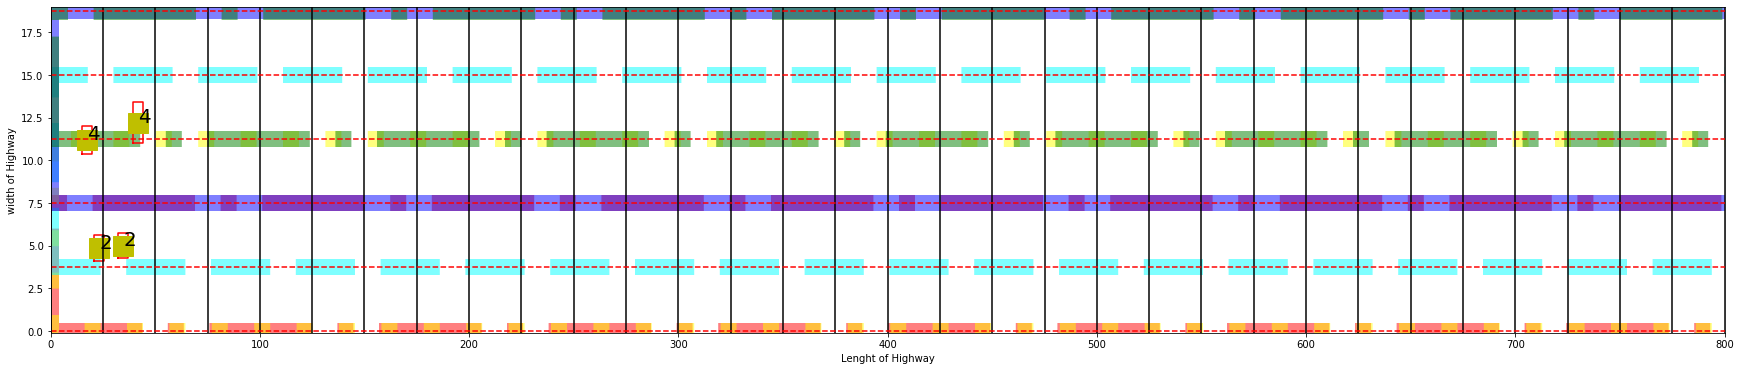

########################  time :  14:49:42:300000   ##############################


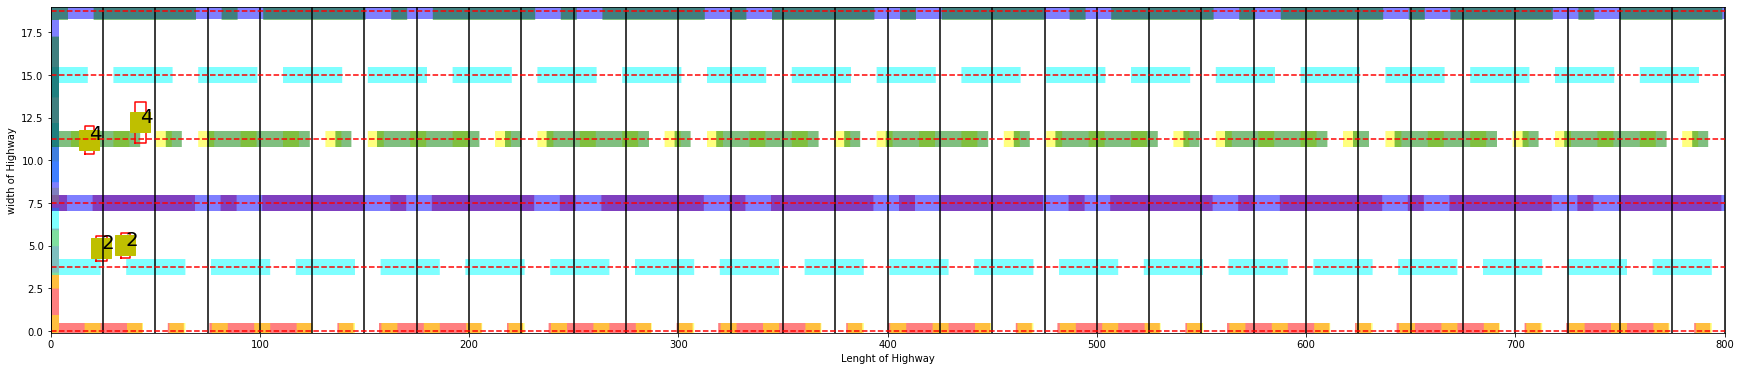

########################  time :  14:49:42:400000   ##############################


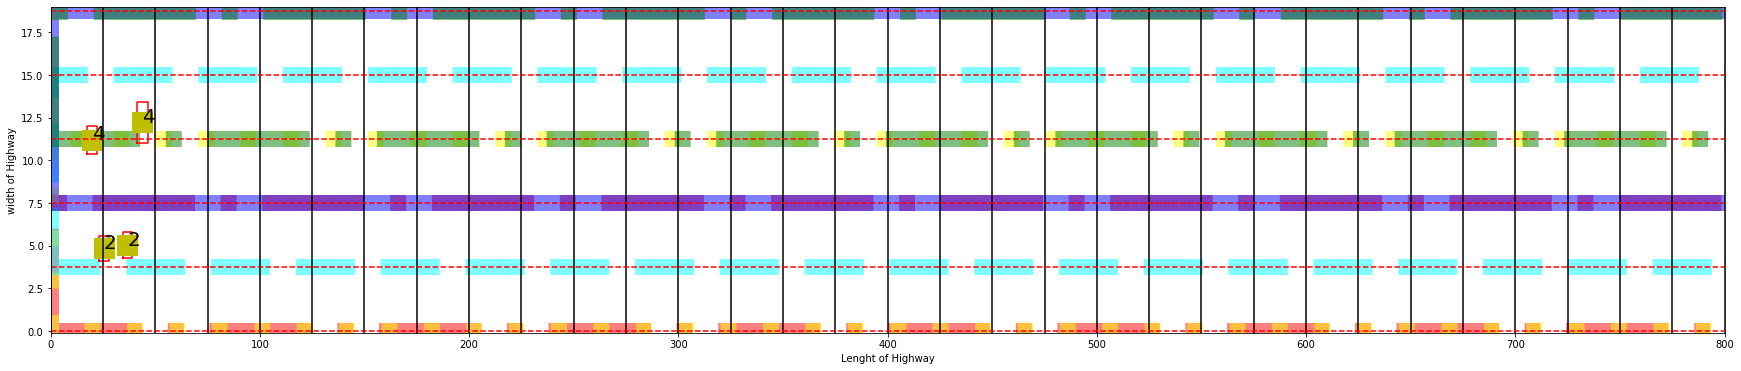

########################  time :  14:49:42:500000   ##############################


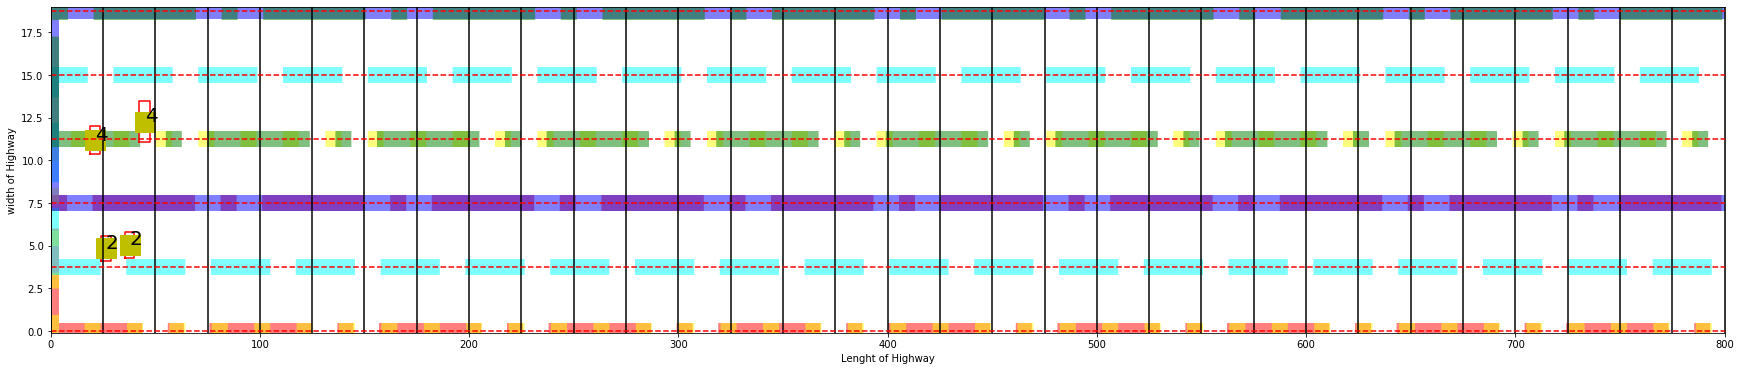

########################  time :  14:49:42:600000   ##############################


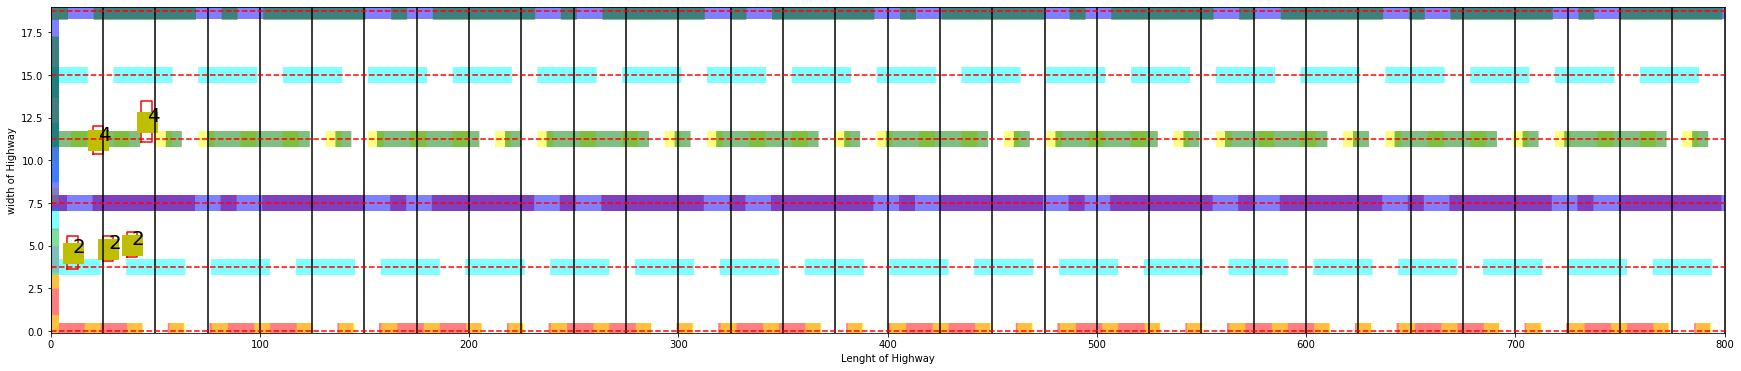

########################  time :  14:49:42:700000   ##############################


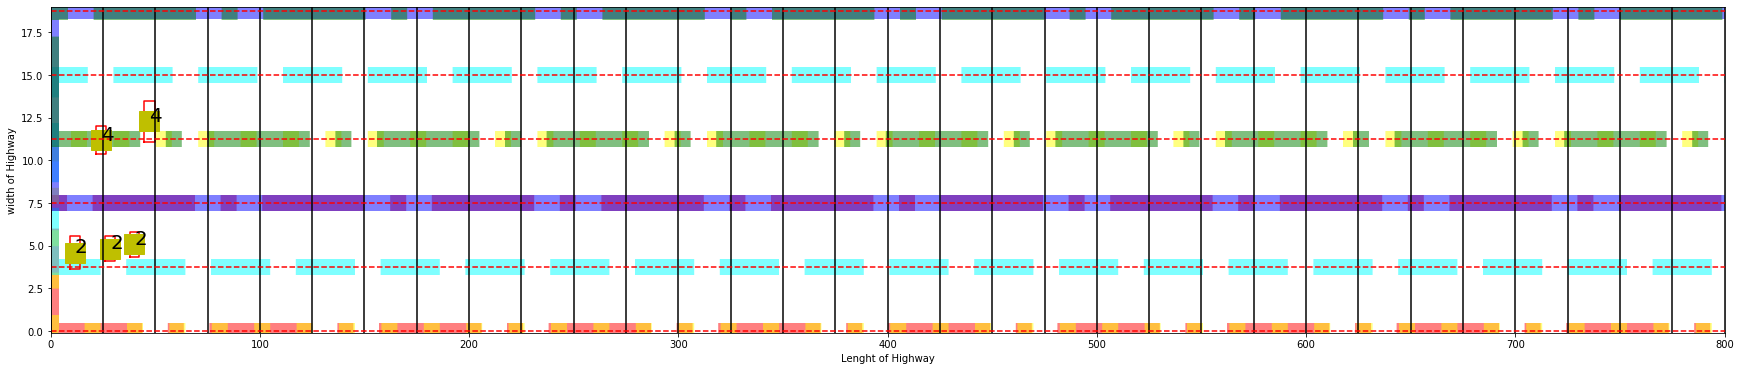

########################  time :  14:49:42:800000   ##############################


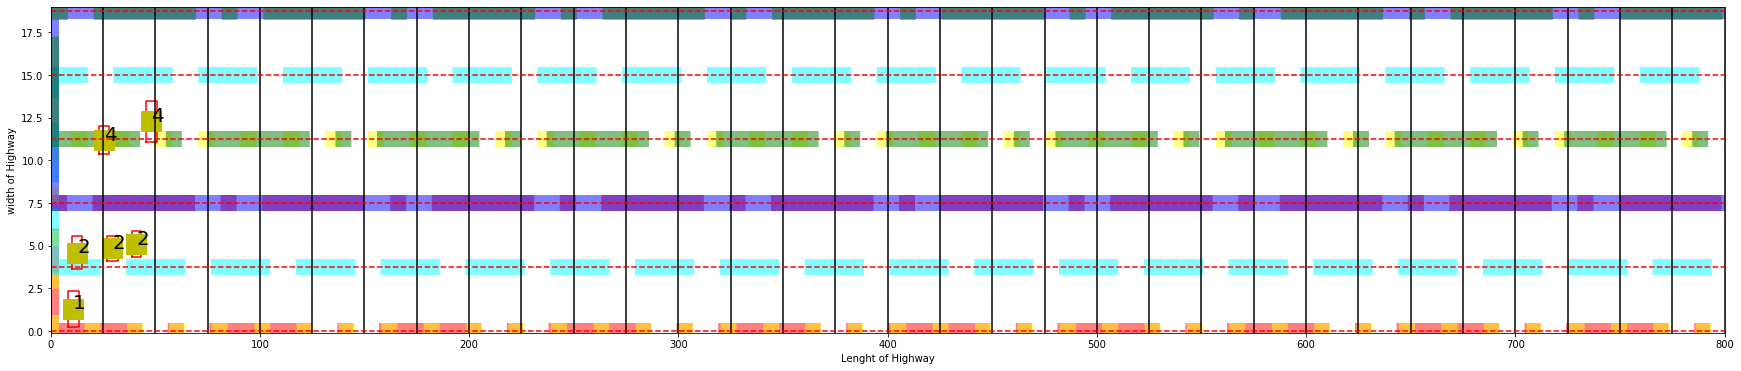

########################  time :  14:49:42:900000   ##############################


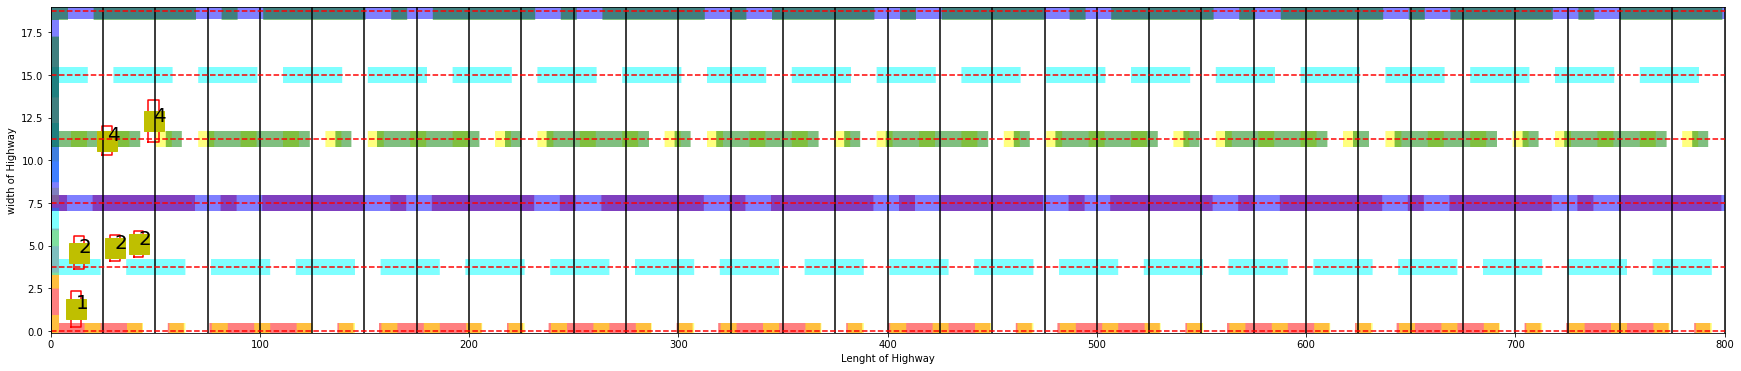

########################  time :  14:49:43:000000   ##############################


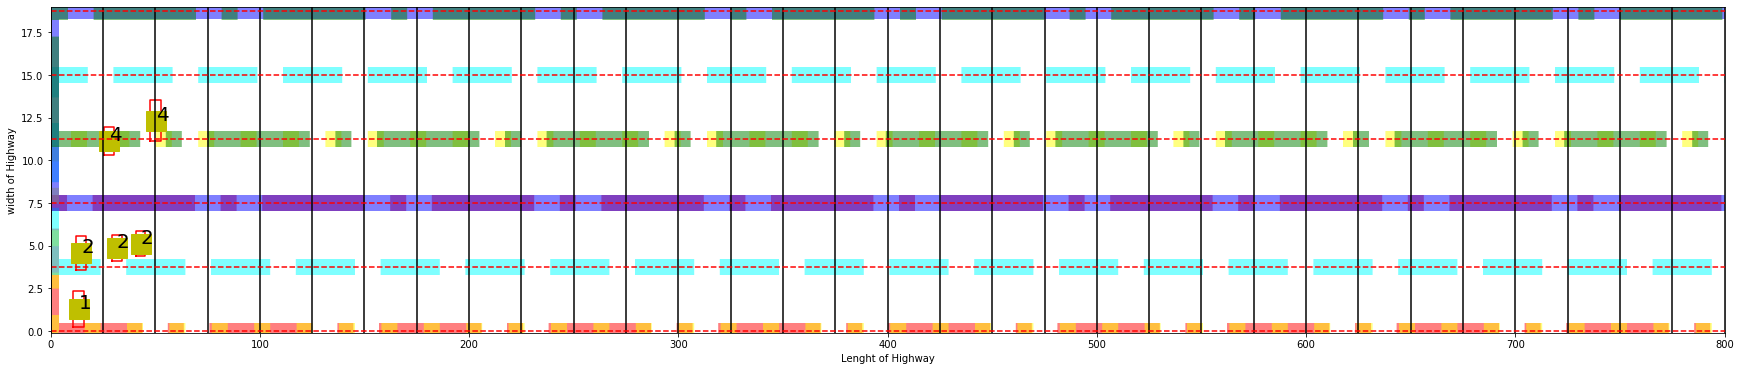

########################  time :  14:49:43:100000   ##############################


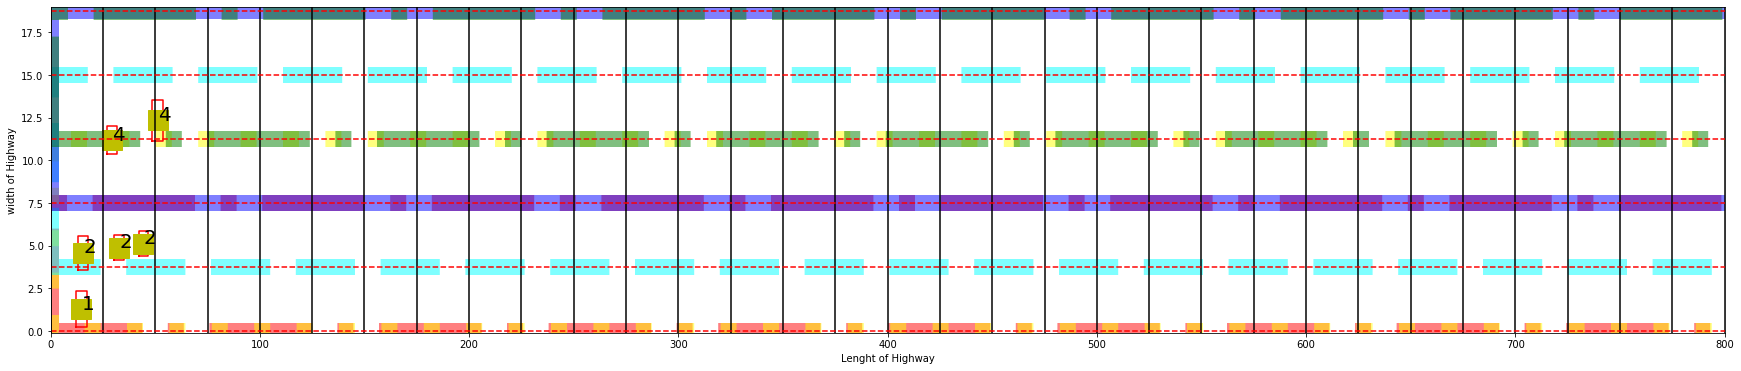

########################  time :  14:49:43:200000   ##############################


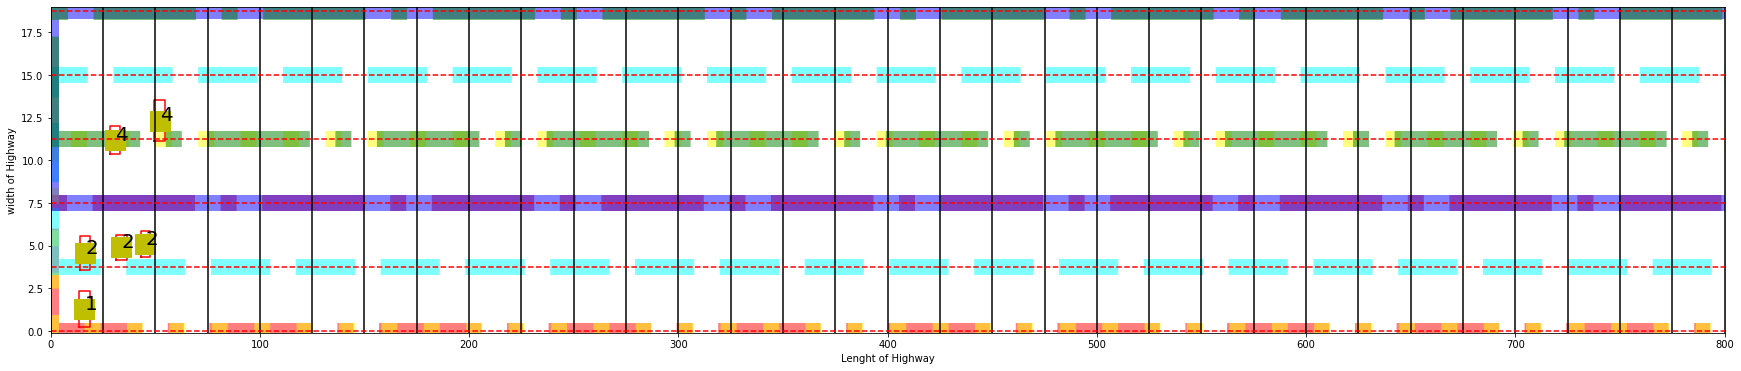

########################  time :  14:49:43:300000   ##############################


KeyboardInterrupt: 

In [72]:
print("1,2","\n1,2,3","\n2,3,4","\n3,4,5","\n4,5")
def plott(item):
    y   = item[1][5]
    x   = item[1][4]
    l   = item[1][6]
    w   = item[1][7]
    i_d = item[1][0]
    t_f = item[1][2]
    v_c = item[1][8]
    f_i = item[1][2]
    l_i = item[1][11]
    
    plt.xlim(0,800)
    plt.ylim(-0.1,19)
    #fig.suptitle('US-101')
    plt.xlabel('Lenght of Highway')
    plt.ylabel('width of Highway')
    plt.plot([y-l/2, y+l/2, y+l/2, y-l/2,y-l/2],[x-w/2, x-w/2, x+w/2, x+w/2,x-w/2],'r')
    plt.text(y, x, str(l_i), fontsize=20)
    plt.plot(y,x,marker="s",markersize=20,c='y')
    #plt.text(x, y, str((i_d,t_f)), fontsize=12)
    
for cars in times:
    cars[1].reset_index(inplace=True,drop=True)
    print("########################  time : ",cars[0],"  ##############################")
    #print('########################  time  ##############################',cars[1])

    #time.sleep(.1)
    #print(cars[0])
    #print(cars[1])
    #print(type(cars[1]))
    fig = plt.figure(figsize=(30, 6))
    for row in cars[1].iterrows():
        #print(row)
        #print(type(row))
        #print(len(row))
        #print(row[1])
        plott(row)
    #fig = plt.figure(figsize=(20, 6))
    #fig.title('US-101')
    xposition = np.arange(0, 850, 25).tolist()
    for xc in xposition:
        plt.axvline(x=xc, color='k', linestyle='-')
    yposition = np.arange(0, 19, 3.75).tolist()
    for yc in yposition:
        plt.axhline(y=yc, color='r', linestyle='--')                                
    ##[0.0, 3.75, 7.5, 11.25, 15.0, 18.75]
    plt.axhspan(ymin=0, ymax=7.5, xmin=0, xmax=50 , edgecolor = 'red', alpha=0.5,facecolor = 'none',linewidth = 16,ls='-.')
    plt.axhspan(ymin=0, ymax=11.25,xmin=0, xmax=50 ,  edgecolor = 'yellow', alpha=0.5,facecolor = 'none',linewidth = 16,ls=':')
    plt.axhspan(ymin=3.75, ymax=15, xmin=0, xmax=50 , edgecolor = 'cyan', alpha=0.5,facecolor = 'none',linewidth = 16,ls='--')
    plt.axhspan(ymin=7.5, ymax=18.75, xmin=0, xmax=50 , edgecolor = 'blue', alpha=0.5,facecolor = 'none',linewidth = 16,ls='-')
    plt.axhspan(ymin=11.25, ymax=18.7, xmin=0, xmax=50 , edgecolor = 'green', alpha=0.5,facecolor = 'none',linewidth = 16,ls='-.')
    plt.show()


# Labeling

In [19]:
# print("1,2","\n1,2,3","\n2,3,4","\n3,4,5","\n4,5")
def Car_Names(List):
    if (len(List)>4) or (len(List)==0):
        pass
    else:
        number_cars_in_lane1 = sum(1 for i in List if i['Lane_ID'] ==1)
        number_cars_in_lane2 = sum(1 for i in List if i['Lane_ID'] ==2)
       
        if (number_cars_in_lane1==0) or (number_cars_in_lane1>2) or (number_cars_in_lane2>2):
            pass
        else:
            List_Lane1=[i for i in List if i['Lane_ID'] ==1]
            List_Lane2=[i for i in List if i['Lane_ID'] ==2]
            if (len(List_Lane1)==2):
                if List_Lane1[1]['Local_Y'] > List_Lane1[0]['Local_Y']:
                    Forward=[List_Lane1[1][4],List_Lane1[1][5],List_Lane1[1][6],
                             List_Lane1[1][7],List_Lane1[1][9],List_Lane1[1][10]]
                    Ego=[List_Lane1[0][4],List_Lane1[0][5],List_Lane1[0][6],
                               List_Lane1[0][7],List_Lane1[0][9],List_Lane1[0][10]]
                else:
                    Ego=[List_Lane1[1][4],List_Lane1[1][5],List_Lane1[1][6],
                             List_Lane1[1][7],List_Lane1[1][9],List_Lane1[1][10]]
                    Forward=[List_Lane1[0][4],List_Lane1[0][5],List_Lane1[0][6],
                               List_Lane1[0][7],List_Lane1[0][9],List_Lane1[0][10]]
            if (len(List_Lane1)==1):
                Ego=[List_Lane1[0][4],List_Lane1[0][5],List_Lane1[0][6],
                               List_Lane1[0][7],List_Lane1[0][9],List_Lane1[0][10]]
                Forward=["not_exist"]
                
            if (len(List_Lane2)==0):
                adjac_forward=["not_exist"]
                adjac_back=["not_exist"]
                
            if (len(List_Lane2)==1):
                
                if (List_Lane2[0]['Local_Y'] > Ego[5]):
                    adjac_forward=[List_Lane2[0][4],List_Lane2[0][5],List_Lane2[0][6],
                               List_Lane2[0][7],List_Lane2[0][9],List_Lane2[0][10]]
                    adjac_back=["not_exist"]                    
                if (List_Lane2[0]['Local_Y'] < Ego[5]):
                    adjac_back=[List_Lane2[0][4],List_Lane2[0][5],List_Lane2[0][6],
                               List_Lane2[0][7],List_Lane2[0][9],List_Lane2[0][10]]
                    adjac_forward=["not_exist"]
                    
            if (len(List_Lane2)==2):    
                if ((List_Lane2[0]['Local_Y'] < Ego[5])and(List_Lane2[1]['Local_Y'] < Ego[5])):
                    adjac_forward=["not_exist"]
                    if List_Lane2[1]['Local_Y'] > List_Lane2[0]['Local_Y']:
                        adjac_back=[List_Lane2[1][4],List_Lane2[1][5],List_Lane2[1][6],
                               List_Lane2[1][7],List_Lane2[1][9],List_Lane2[1][10]]
                    if List_Lane2[1]['Local_Y'] < List_Lane2[0]['Local_Y']:
                        adjac_back=[List_Lane2[0][4],List_Lane2[0][5],List_Lane2[0][6],
                               List_Lane2[0][7],List_Lane2[0][9],List_Lane2[0][10]]
                    

                
            if (len(List_Lane2)==2):    
                if ((List_Lane2[0]['Local_Y'] > Ego[5])and(List_Lane2[1]['Local_Y'] > Ego[5])):
                    adjac_back=["not_exist"]
                    if List_Lane2[1]['Local_Y'] < List_Lane2[0]['Local_Y']:
                        adjac_forward=[List_Lane2[1][4],List_Lane2[1][5],List_Lane2[1][6],
                               List_Lane2[1][7],List_Lane2[1][9],List_Lane2[1][10]]
                    if List_Lane2[1]['Local_Y'] > List_Lane2[0]['Local_Y']:
                        adjac_forward=[List_Lane2[0][4],List_Lane2[0][5],List_Lane2[0][6],
                               List_Lane2[0][7],List_Lane2[0][9],List_Lane2[0][10]]
                
                
            if (len(List_Lane2)==2):    
                if (List_Lane2[1]['Local_Y'] < Ego[5] <List_Lane2[0]['Local_Y'])or(List_Lane2[0]['Local_Y'] < Ego[5] <List_Lane2[1]['Local_Y']):
                     if List_Lane2[1]['Local_Y'] < List_Lane2[0]['Local_Y']:
                        adjac_forward=[List_Lane2[0][4],List_Lane2[0][5],List_Lane2[0][6],
                               List_Lane2[0][7],List_Lane2[0][9],List_Lane2[0][10]]
                        adjac_back=[List_Lane2[1][4],List_Lane2[1][5],List_Lane2[1][6],
                               List_Lane2[1][7],List_Lane2[1][9],List_Lane2[1][10]]
                     if List_Lane2[0]['Local_Y'] < List_Lane2[1]['Local_Y']:
                         adjac_forward=[List_Lane2[1][4],List_Lane2[1][5],List_Lane2[1][6],
                               List_Lane2[1][7],List_Lane2[1][9],List_Lane2[1][10]]
                         adjac_back=[List_Lane2[0][4],List_Lane2[0][5],List_Lane2[0][6],
                               List_Lane2[0][7],List_Lane2[0][9],List_Lane2[0][10]]
                        
            f = open("dict.txt","a")
            dict = {'Ego' : Ego, 'Forward' : Forward, 'adjac_forward' : adjac_forward, 'adjac_back' : adjac_back}
            f.write( str(dict) )
            f.write("\n")
            f.close()
    
def Sections(item):
    section_1_2=[]
    section_1_2_3=[]
    section_2_3_4=[]
    section_3_4_5=[]
    section_4_5=[]
    for i in item.iterrows():
        y   = i[1][5]   ; x   = i[1][4] ;
        l   = i[1][6]   ; w   = i[1][7] ;
        i_d = i[1][0]
        t_f = i[1][2]
        v_c = i[1][8]
        f_i = i[1][2]
        v_v = i[1][9]   ;v_a = i[1][10] ;
        l_i = i[1][11]
        #print(i[1]['Lane_ID'])
        #print("########################################")
        if (i[1]['Lane_ID'] ==1 ):
            section_1_2.append(i[1])
            section_1_2_3.append(i[1])
            
        if (i[1]['Lane_ID'] ==2 ):
            section_1_2.append(i[1])
            section_1_2_3.append(i[1])
            section_2_3_4.append(i[1])
            
        if (i[1]['Lane_ID'] ==3 ):
            section_1_2_3.append(i[1])
            section_2_3_4.append(i[1])
            section_3_4_5.append(i[1])
            
        if (i[1]['Lane_ID'] ==4 ):
            section_2_3_4.append(i[1])
            section_3_4_5.append(i[1])
            section_4_5.append(i[1])

        if (i[1]['Lane_ID'] ==5 ):
            section_3_4_5.append(i[1])
            section_4_5.append(i[1])
        #print(type(section_1_2[0]))
    Car_Names(section_1_2)
    
    
for cars in times:
    cars[1].reset_index(inplace=True,drop=True)
#     print("#################################  time : ",cars[0],"  #################################")
#     print(type(cars[1]))
#     print(len(cars[1]))
    
    Zone_1=cars[1][(cars[1]['Local_Y'] <=25 )]
    Sections(Zone_1)
#     print("######################################## Zone_1 ################################\n",Zone_1)
    Zone_2=cars[1][(cars[1]['Local_Y'] <=50 ) & (cars[1]['Local_Y'] >25)] 
    Sections(Zone_2)
#     print("######################################## Zone_2 ################################\n",Zone_2)
    Zone_3=cars[1][(cars[1]['Local_Y'] <=75 ) & (cars[1]['Local_Y'] >50)]
    Sections(Zone_3)
#     print("######################################## Zone_3 ################################\n",Zone_3)
    Zone_4=cars[1][(cars[1]['Local_Y'] <=100 ) & (cars[1]['Local_Y'] >75)]
    Sections(Zone_4)
#     print("######################################## Zone_4 ################################\n",Zone_4)
    Zone_5=cars[1][(cars[1]['Local_Y'] <=125 ) & (cars[1]['Local_Y'] >100)]
    Sections(Zone_5)
#     print("######################################## Zone_5 ################################\n",Zone_5)
    Zone_6=cars[1][(cars[1]['Local_Y'] <=150 ) & (cars[1]['Local_Y'] >125)]
    Sections(Zone_6)
#     print("######################################## Zone_6 ################################\n",Zone_6)
    Zone_7=cars[1][(cars[1]['Local_Y'] <=175 ) & (cars[1]['Local_Y'] >150)]
    Sections(Zone_7)
#     print("######################################## Zone_7 ################################\n",Zone_7)
    Zone_8=cars[1][(cars[1]['Local_Y'] <=200 ) & (cars[1]['Local_Y'] >175)]
    Sections(Zone_8)
#     print("######################################## Zone_8 ################################\n",Zone_8)
    Zone_9=cars[1][(cars[1]['Local_Y'] <=225 ) & (cars[1]['Local_Y'] >200)]
    Sections(Zone_9)
#     print("######################################## Zone_9 ################################\n",Zone_9)
    Zone_10=cars[1][(cars[1]['Local_Y'] <=250 ) & (cars[1]['Local_Y'] >225)]
    Sections(Zone_10)
#     print("######################################## Zone_10 ################################\n",Zone_10)
    Zone_11=cars[1][(cars[1]['Local_Y'] <=275 ) & (cars[1]['Local_Y'] >250)]
    Sections(Zone_11)
#     print("######################################## Zone_11 ################################\n",Zone_11)
    Zone_12=cars[1][(cars[1]['Local_Y'] <=300 ) & (cars[1]['Local_Y'] >275)]
    Sections(Zone_12)
#     print("######################################## Zone_12 ################################\n",Zone_12)
    Zone_13=cars[1][(cars[1]['Local_Y'] <=325 ) & (cars[1]['Local_Y'] >300)]
    Sections(Zone_13)
#     print("######################################## Zone_13 ################################\n",Zone_13)
    Zone_14=cars[1][(cars[1]['Local_Y'] <=350 ) & (cars[1]['Local_Y'] >325)]
    Sections(Zone_14)
#     print("######################################## Zone_14 ################################\n",Zone_14)
    Zone_15=cars[1][(cars[1]['Local_Y'] <=375 ) & (cars[1]['Local_Y'] >350)]
    Sections(Zone_15)
#     print("######################################## Zone_15 ################################\n",Zone_15)
    Zone_16=cars[1][(cars[1]['Local_Y'] <=400 ) & (cars[1]['Local_Y'] >375)]
    Sections(Zone_16)
#     print("######################################## Zone_16 ################################\n",Zone_16)
    Zone_17=cars[1][(cars[1]['Local_Y'] <=425 ) & (cars[1]['Local_Y'] >400)]
    Sections(Zone_17)
#     print("######################################## Zone_17 ################################\n",Zone_17)
    Zone_18=cars[1][(cars[1]['Local_Y'] <=450 ) & (cars[1]['Local_Y'] >425)]
    Sections(Zone_18)
#     print("######################################## Zone_18 ################################\n",Zone_18)
    Zone_19=cars[1][(cars[1]['Local_Y'] <=475 ) & (cars[1]['Local_Y'] >450)]
    Sections(Zone_19)
#     print("######################################## Zone_19 ################################\n",Zone_19)
    Zone_20=cars[1][(cars[1]['Local_Y'] <=500 ) & (cars[1]['Local_Y'] >475)]
    Sections(Zone_20)
#     print("######################################## Zone_20 ################################\n",Zone_20)
    Zone_21=cars[1][(cars[1]['Local_Y'] <=525 ) & (cars[1]['Local_Y'] >500)]
    Sections(Zone_21)
#     print("######################################## Zone_21 ################################\n",Zone_21)
    Zone_22=cars[1][(cars[1]['Local_Y'] <=550 ) & (cars[1]['Local_Y'] >525)]
    Sections(Zone_22)
#     print("######################################## Zone_22 ################################\n",Zone_22)
    Zone_23=cars[1][(cars[1]['Local_Y'] <=575 ) & (cars[1]['Local_Y'] >550)]
    Sections(Zone_23)
#     print("######################################## Zone_23 ################################\n",Zone_23)
    Zone_24=cars[1][(cars[1]['Local_Y'] <=600 ) & (cars[1]['Local_Y'] >575)]
    Sections(Zone_24)
#     print("######################################## Zone_23 ################################\n",Zone_23)



KeyboardInterrupt: 

# Leave

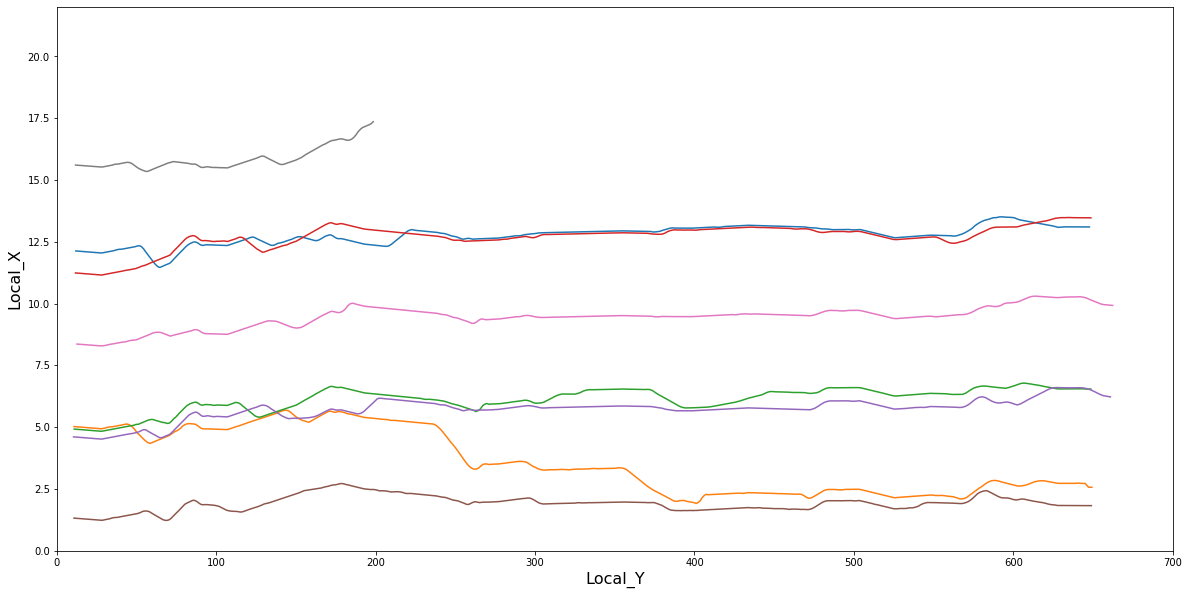

In [21]:
print("max & min of US-101 total frame","\n\nmax: ",df['Total_Frames'].max(),"\nmin: ",df['Total_Frames'].min())

df_split = np.array_split(df,135)
df_split[0]   

group1=df_split[0]
group1.sort_values(['Vehicle_ID','Total_Frames','Global_Time','Local_Y'],inplace=True)
grouped1 = group1.groupby(['Vehicle_ID','Total_Frames'])
print(len(grouped1))


def Sort(sub_li): 
    sub_li.sort(key = lambda x: x['Global_Time'].iloc[0]) 
    return sub_li 
  
# Driver Code 
sub_li =Vehicles_Trajectoy_round_one
print(Sort(sub_li)) 

fig= plt.figure(figsize=(20,10))
count=0
for path in Sort(sub_li):
    if count<8:
        path=path.to_numpy()
        yline = path[:,[4]].flatten()
        xline = path[:,[5]].flatten()
        plt.xlim(0, 700) 
        plt.ylim(0, 22)
        plt.plot(xline, yline)
        plt.xlabel('Local_Y', fontsize=16)
        plt.ylabel('Local_X', fontsize=16)
        count=count+1

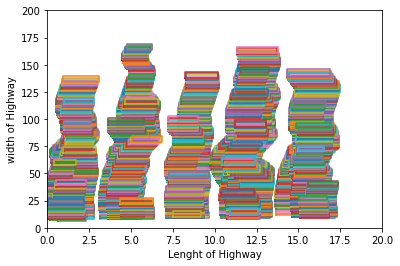

<Figure size 432x288 with 0 Axes>

In [8]:
def plott(i,item):
    y =item.iloc[i,4]
    x = item.iloc[i,5]
    l = item.iloc[i,6]
    w = item.iloc[i,7]
    plt.xlim(0,20)
    plt.ylim(0,200)
    #fig.suptitle('US-101')
    plt.xlabel('Lenght of Highway')
    plt.ylabel('width of Highway')
    plt.plot([y-w/2, y+w/2, y+w/2,y-w/2,y-w/2],[x-l/2, x-l/2,x+l/2,x+l/2,x-l/2])


for i in range(2080):
    #print(i)
    plott(i,df_split[0])


fig = plt.figure()
fig.suptitle('US-101')
plt.show()

In [9]:
grouped = df_split[0].groupby(['Global_Time']) 

########################  time  ############################## 14:49:39:700000
********************************* <class 'str'> <class 'pandas.core.frame.DataFrame'> (1, 16)


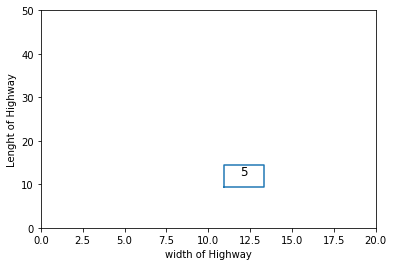

<Figure size 432x288 with 0 Axes>

enter somthing 
########################  time  ############################## 14:49:39:800000
********************************* <class 'str'> <class 'pandas.core.frame.DataFrame'> (1, 16)


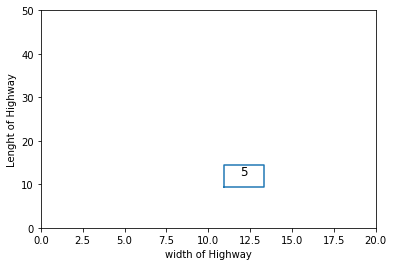

<Figure size 432x288 with 0 Axes>

enter somthing 
########################  time  ############################## 14:49:39:900000
********************************* <class 'str'> <class 'pandas.core.frame.DataFrame'> (1, 16)


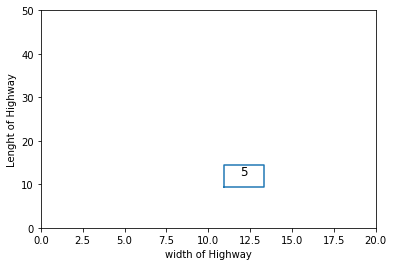

<Figure size 432x288 with 0 Axes>

enter somthing 
########################  time  ############################## 14:49:40:000000
********************************* <class 'str'> <class 'pandas.core.frame.DataFrame'> (1, 16)


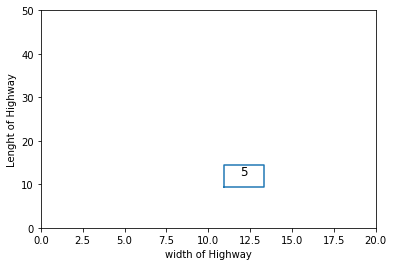

<Figure size 432x288 with 0 Axes>

enter somthing 
########################  time  ############################## 14:49:40:100000
********************************* <class 'str'> <class 'pandas.core.frame.DataFrame'> (1, 16)


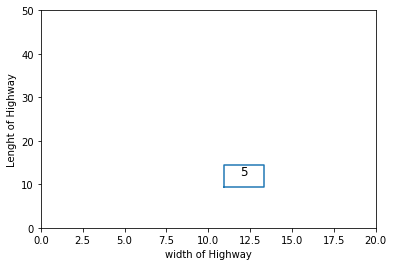

<Figure size 432x288 with 0 Axes>

enter somthing 
########################  time  ############################## 14:49:40:200000
********************************* <class 'str'> <class 'pandas.core.frame.DataFrame'> (2, 16)


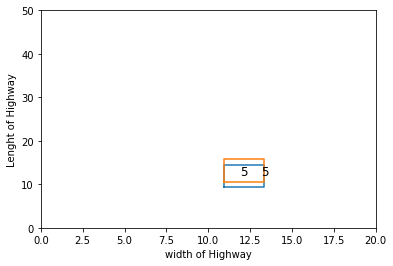

<Figure size 432x288 with 0 Axes>

enter somthing 
########################  time  ############################## 14:49:40:300000
********************************* <class 'str'> <class 'pandas.core.frame.DataFrame'> (2, 16)


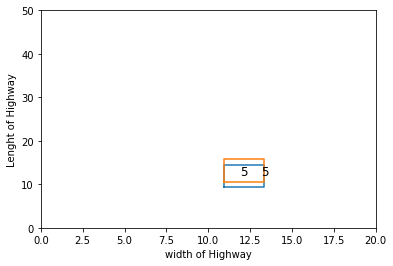

<Figure size 432x288 with 0 Axes>

enter somthing 
########################  time  ############################## 14:49:40:400000
********************************* <class 'str'> <class 'pandas.core.frame.DataFrame'> (2, 16)


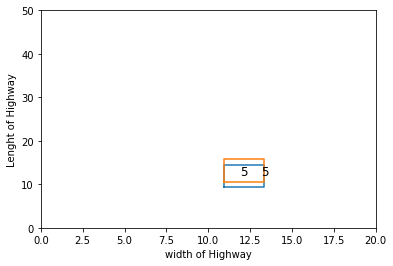

<Figure size 432x288 with 0 Axes>

enter somthing 
########################  time  ############################## 14:49:40:500000
********************************* <class 'str'> <class 'pandas.core.frame.DataFrame'> (2, 16)


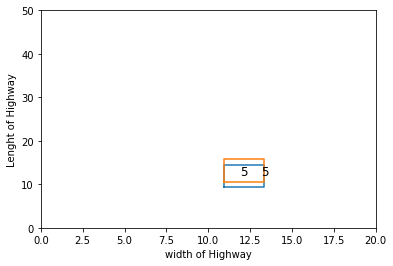

<Figure size 432x288 with 0 Axes>

enter somthing 
########################  time  ############################## 14:49:40:600000
********************************* <class 'str'> <class 'pandas.core.frame.DataFrame'> (2, 16)


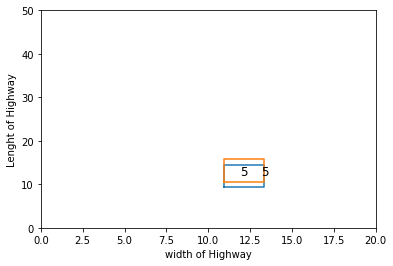

<Figure size 432x288 with 0 Axes>

enter somthing 
########################  time  ############################## 14:49:40:700000
********************************* <class 'str'> <class 'pandas.core.frame.DataFrame'> (2, 16)


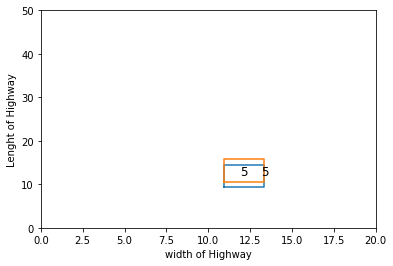

<Figure size 432x288 with 0 Axes>

enter somthing 
########################  time  ############################## 14:49:40:800000
********************************* <class 'str'> <class 'pandas.core.frame.DataFrame'> (2, 16)


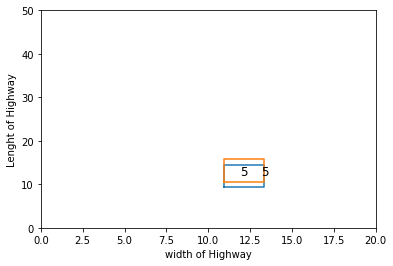

<Figure size 432x288 with 0 Axes>

enter somthing 
########################  time  ############################## 14:49:40:900000
********************************* <class 'str'> <class 'pandas.core.frame.DataFrame'> (2, 16)


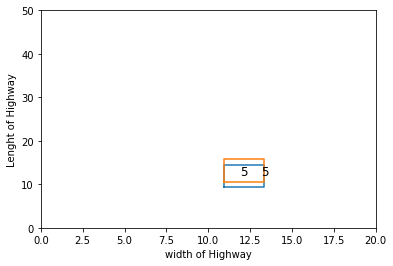

<Figure size 432x288 with 0 Axes>

enter somthing 
########################  time  ############################## 14:49:41:000000
********************************* <class 'str'> <class 'pandas.core.frame.DataFrame'> (2, 16)


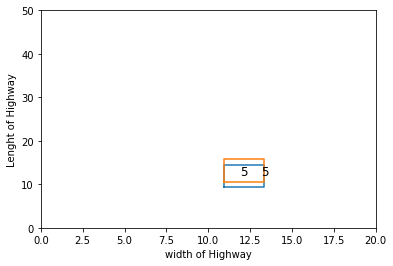

<Figure size 432x288 with 0 Axes>

enter somthing 
########################  time  ############################## 14:49:41:100000
********************************* <class 'str'> <class 'pandas.core.frame.DataFrame'> (3, 16)


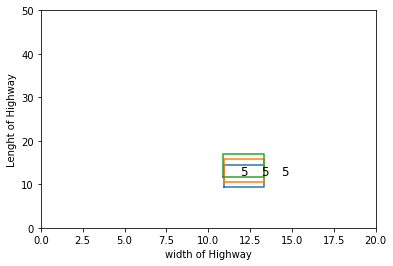

<Figure size 432x288 with 0 Axes>

enter somthing 
########################  time  ############################## 14:49:41:200000
********************************* <class 'str'> <class 'pandas.core.frame.DataFrame'> (3, 16)


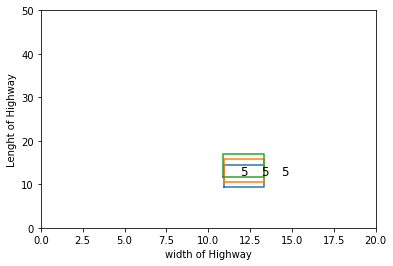

<Figure size 432x288 with 0 Axes>

enter somthing 
########################  time  ############################## 14:49:41:300000
********************************* <class 'str'> <class 'pandas.core.frame.DataFrame'> (3, 16)


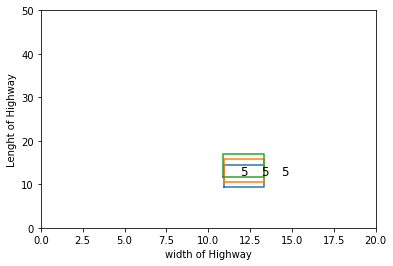

<Figure size 432x288 with 0 Axes>

enter somthing 
########################  time  ############################## 14:49:41:400000
********************************* <class 'str'> <class 'pandas.core.frame.DataFrame'> (3, 16)


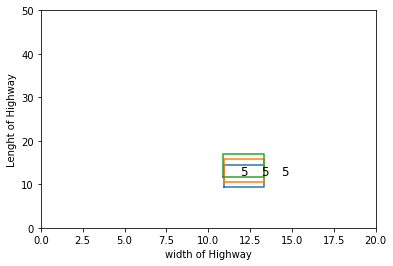

<Figure size 432x288 with 0 Axes>

enter somthing 
########################  time  ############################## 14:49:41:500000
********************************* <class 'str'> <class 'pandas.core.frame.DataFrame'> (3, 16)


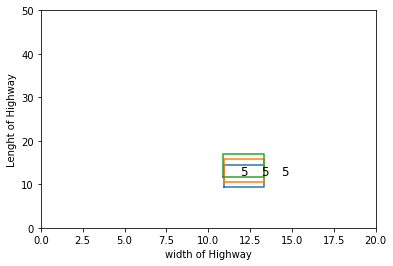

<Figure size 432x288 with 0 Axes>

enter somthing 
########################  time  ############################## 14:49:41:600000
********************************* <class 'str'> <class 'pandas.core.frame.DataFrame'> (3, 16)


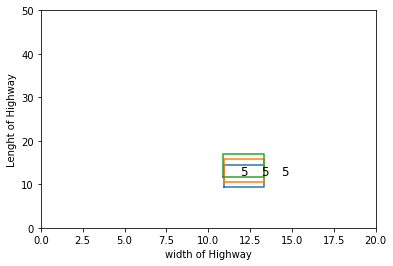

<Figure size 432x288 with 0 Axes>

enter somthing 
########################  time  ############################## 14:49:41:700000
********************************* <class 'str'> <class 'pandas.core.frame.DataFrame'> (3, 16)


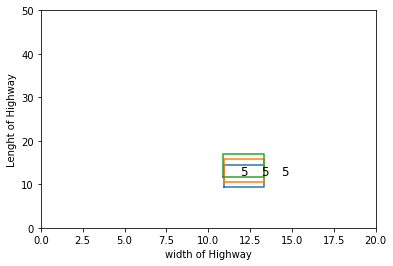

<Figure size 432x288 with 0 Axes>

enter somthing 
########################  time  ############################## 14:49:41:800000
********************************* <class 'str'> <class 'pandas.core.frame.DataFrame'> (4, 16)


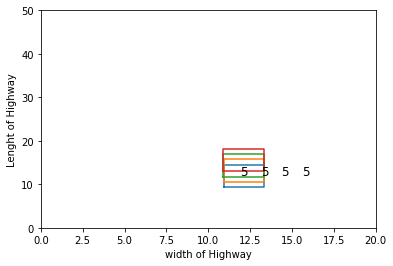

<Figure size 432x288 with 0 Axes>

enter somthing 
########################  time  ############################## 14:49:41:900000
********************************* <class 'str'> <class 'pandas.core.frame.DataFrame'> (4, 16)


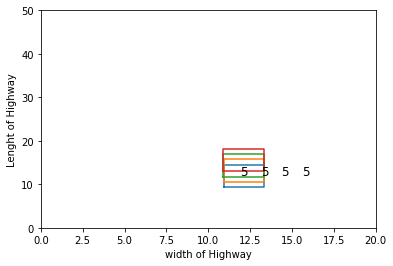

<Figure size 432x288 with 0 Axes>

enter somthing 
########################  time  ############################## 14:49:42:000000
********************************* <class 'str'> <class 'pandas.core.frame.DataFrame'> (4, 16)


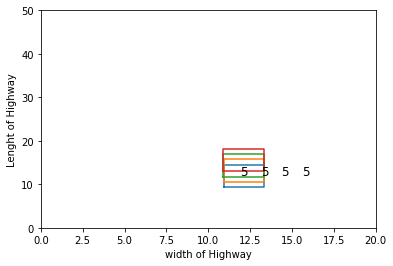

<Figure size 432x288 with 0 Axes>

enter somthing 
########################  time  ############################## 14:49:42:100000
********************************* <class 'str'> <class 'pandas.core.frame.DataFrame'> (5, 16)


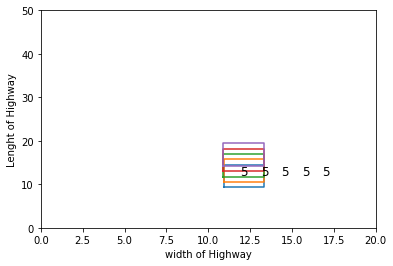

<Figure size 432x288 with 0 Axes>

enter somthing 
########################  time  ############################## 14:49:42:200000
********************************* <class 'str'> <class 'pandas.core.frame.DataFrame'> (5, 16)


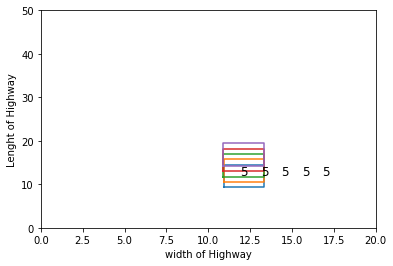

<Figure size 432x288 with 0 Axes>

enter somthing 
########################  time  ############################## 14:49:42:300000
********************************* <class 'str'> <class 'pandas.core.frame.DataFrame'> (5, 16)


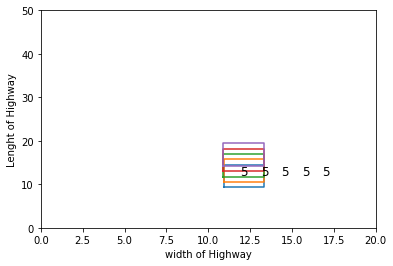

<Figure size 432x288 with 0 Axes>

enter somthing 
########################  time  ############################## 14:49:42:400000
********************************* <class 'str'> <class 'pandas.core.frame.DataFrame'> (5, 16)


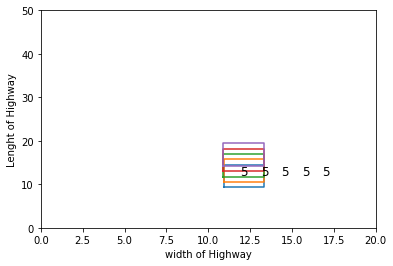

<Figure size 432x288 with 0 Axes>

In [ ]:
def plott(i,item):
    y =item.iloc[i,4]
    x = item.iloc[i,5]
    l = item.iloc[i,6]
    w = item.iloc[i,7]
    i_d =item.iloc[i,0]
    t_f = item.iloc[i,2]
    v_c = item.iloc[i,8]
    f_i = item.iloc[i,2]
    
    plt.xlim(0,20)
    plt.ylim(0,50)
    #fig.suptitle('US-101')
    plt.xlabel('width of Highway')
    plt.ylabel('Lenght of Highway')
    plt.plot([y-w/2, y+w/2, y+w/2,y-w/2,y-w/2],[x-l/2, x-l/2,x+l/2,x+l/2,x-l/2])
    plt.text(x, y, str(i_d), fontsize=12)
    #plt.text(x, y, str((i_d,t_f)), fontsize=12)
    
    
for name, group in grouped:
    print('########################  time  ##############################',name)
    #print(group)
    print('*********************************',type(name),type(group),group.shape)
    for i in range(group.shape[0]):
        plott(i,df_split[0])
    fig = plt.figure()
    #fig.title('US-101')
    plt.show()
    a=input("enter somthing ")
    if a=="finish":
        break

# Excersise

In [26]:
# print("1,2","\n1,2,3","\n2,3,4","\n3,4,5","\n4,5")
def S12_Car_Names(List,current_lane,adjac_lane):
    if (len(List)>4) or (len(List)==0):
        pass
    else:
        number_cars_in_lane1 = sum(1 for i in List if i['Lane_ID'] ==current_lane)
        number_cars_in_lane2 = sum(1 for i in List if i['Lane_ID'] ==adjac_lane)
       
        if (number_cars_in_lane1==0) or (number_cars_in_lane1>2) or (number_cars_in_lane2>2):
            pass
        else:
            List_Lane1=[i for i in List if i['Lane_ID'] ==current_lane]
            List_Lane2=[i for i in List if i['Lane_ID'] ==adjac_lane]
            if (len(List_Lane1)==2):
                if List_Lane1[1]['Local_Y'] > List_Lane1[0]['Local_Y']:
                    Forward=[List_Lane1[1][4],List_Lane1[1][5],List_Lane1[1][6],
                             List_Lane1[1][7],List_Lane1[1][9],List_Lane1[1][10]]
                    Ego=[List_Lane1[0][4],List_Lane1[0][5],List_Lane1[0][6],
                         List_Lane1[0][7],List_Lane1[0][9],List_Lane1[0][10]]
                else:
                    Ego=[List_Lane1[1][4],List_Lane1[1][5],List_Lane1[1][6],
                             List_Lane1[1][7],List_Lane1[1][9],List_Lane1[1][10]]
                    Forward=[List_Lane1[0][4],List_Lane1[0][5],List_Lane1[0][6],
                             List_Lane1[0][7],List_Lane1[0][9],List_Lane1[0][10]]
            if (len(List_Lane1)==1):
                Ego=[List_Lane1[0][4],List_Lane1[0][5],List_Lane1[0][6],
                               List_Lane1[0][7],List_Lane1[0][9],List_Lane1[0][10]]
                Forward=["not_exist"]                
            if (len(List_Lane2)==0):
                adjac_forward=["not_exist"]
                adjac_back=["not_exist"]                
            if (len(List_Lane2)==1):
                if (List_Lane2[0]['Local_Y'] > Ego[1]):
                    adjac_forward=[List_Lane2[0][4],List_Lane2[0][5],List_Lane2[0][6],
                                   List_Lane2[0][7],List_Lane2[0][9],List_Lane2[0][10]]
                    adjac_back=["not_exist"]                    
                if (List_Lane2[0]['Local_Y'] <= Ego[1]):
                    adjac_back=[List_Lane2[0][4],List_Lane2[0][5],List_Lane2[0][6],
                                List_Lane2[0][7],List_Lane2[0][9],List_Lane2[0][10]]
                    adjac_forward=["not_exist"]                    
            if (len(List_Lane2)==2):    
                if ((List_Lane2[0]['Local_Y'] <= Ego[1])and(List_Lane2[1]['Local_Y'] <= Ego[1])):
                    adjac_forward=["not_exist"]
                    if List_Lane2[1]['Local_Y'] > List_Lane2[0]['Local_Y']:
                        adjac_back=[List_Lane2[1][4],List_Lane2[1][5],List_Lane2[1][6],
                                    List_Lane2[1][7],List_Lane2[1][9],List_Lane2[1][10]]
                    if List_Lane2[1]['Local_Y'] < List_Lane2[0]['Local_Y']:
                        adjac_back=[List_Lane2[0][4],List_Lane2[0][5],List_Lane2[0][6],
                                    List_Lane2[0][7],List_Lane2[0][9],List_Lane2[0][10]]
                    
            if (len(List_Lane2)==2):    
                if ((List_Lane2[0]['Local_Y'] >= Ego[1])and(List_Lane2[1]['Local_Y'] >= Ego[1])):
                    adjac_back=["not_exist"]
                    if List_Lane2[1]['Local_Y'] < List_Lane2[0]['Local_Y']:
                        adjac_forward=[List_Lane2[1][4],List_Lane2[1][5],List_Lane2[1][6],
                                       List_Lane2[1][7],List_Lane2[1][9],List_Lane2[1][10]]
                    if List_Lane2[1]['Local_Y'] > List_Lane2[0]['Local_Y']:
                        adjac_forward=[List_Lane2[0][4],List_Lane2[0][5],List_Lane2[0][6],
                                       List_Lane2[0][7],List_Lane2[0][9],List_Lane2[0][10]]                    
                   
            if (len(List_Lane2)==2):    
                if (List_Lane2[1]['Local_Y'] <= Ego[1] <=List_Lane2[0]['Local_Y'])or(List_Lane2[0]['Local_Y'] < Ego[1] <List_Lane2[1]['Local_Y']):
                     if List_Lane2[1]['Local_Y'] < List_Lane2[0]['Local_Y']:
                        adjac_forward=[List_Lane2[0][4],List_Lane2[0][5],List_Lane2[0][6],
                                       List_Lane2[0][7],List_Lane2[0][9],List_Lane2[0][10]]
                        adjac_back=[List_Lane2[1][4],List_Lane2[1][5],List_Lane2[1][6],
                                    List_Lane2[1][7],List_Lane2[1][9],List_Lane2[1][10]]
                     if List_Lane2[0]['Local_Y'] < List_Lane2[1]['Local_Y']:
                         adjac_forward=[List_Lane2[1][4],List_Lane2[1][5],List_Lane2[1][6],
                                        List_Lane2[1][7],List_Lane2[1][9],List_Lane2[1][10]]
                         adjac_back=[List_Lane2[0][4],List_Lane2[0][5],List_Lane2[0][6],
                                     List_Lane2[0][7],List_Lane2[0][9],List_Lane2[0][10]]
                
            if current_lane==1:           
                f = open("S12_Car_Names.txt","a")
                dict = {'Ego' : Ego, 'Forward' : Forward, 'adjac_forward' : adjac_forward,
                        'adjac_back' : adjac_back}
                f.write( str(dict) )
                f.write("\n")
                f.close()
            if current_lane==5:
                f = open("S45_Car_Names.txt","a")
                dict = {'Ego' : Ego, 'Forward' : Forward, 'adjac_forward' : adjac_forward, 'adjac_back' : adjac_back}
                f.write( str(dict) )
                f.write("\n")
                f.close()
def S123_Car_Names(List,current_lane,left_adjac_lane,right_adjac_lane):
    if (len(List)>6) or (len(List)==0):
        pass
    else:
        number_cars_in_lane1 = sum(1 for i in List if i['Lane_ID'] ==right_adjac_lane)
        number_cars_in_lane2 = sum(1 for i in List if i['Lane_ID'] ==current_lane)
        number_cars_in_lane3 = sum(1 for i in List if i['Lane_ID'] ==left_adjac_lane)
       
        if (number_cars_in_lane2==0) or (number_cars_in_lane2>2) or (number_cars_in_lane1>2) or (number_cars_in_lane3>2):
            pass
        else:
            List_Lane1=[i for i in List if i['Lane_ID'] ==right_adjac_lane]
            List_Lane2=[i for i in List if i['Lane_ID'] ==current_lane]
            List_Lane3=[i for i in List if i['Lane_ID'] ==left_adjac_lane]
            if (len(List_Lane2)==2):
                if List_Lane2[1]['Local_Y'] > List_Lane2[0]['Local_Y']:
                    Forward=[List_Lane2[1][4],List_Lane2[1][5],List_Lane2[1][6],
                             List_Lane2[1][7],List_Lane2[1][9],List_Lane2[1][10]]
                    Ego=[List_Lane2[0][4],List_Lane2[0][5],List_Lane2[0][6],
                         List_Lane2[0][7],List_Lane2[0][9],List_Lane2[0][10]]
                else:
                    Ego=[List_Lane2[1][4],List_Lane2[1][5],List_Lane2[1][6],
                         List_Lane2[1][7],List_Lane2[1][9],List_Lane2[1][10]]
                    Forward=[List_Lane2[0][4],List_Lane2[0][5],List_Lane2[0][6],
                             List_Lane2[0][7],List_Lane2[0][9],List_Lane2[0][10]]
            if (len(List_Lane2)==1):
                Ego=[List_Lane2[0][4],List_Lane2[0][5],List_Lane2[0][6],
                     List_Lane2[0][7],List_Lane2[0][9],List_Lane2[0][10]]
                Forward=["not_exist"]
            if (len(List_Lane1)==0):
                right_adjac_forward=["not_exist"]
                right_adjac_back=["not_exist"]                
            if (len(List_Lane1)==1):
                if (List_Lane1[0]['Local_Y'] > Ego[1]):
                    right_adjac_forward=[List_Lane1[0][4],List_Lane1[0][5],List_Lane1[0][6],
                                         List_Lane1[0][7],List_Lane1[0][9],List_Lane1[0][10]]
                    right_adjac_back=["not_exist"]                    
                if (List_Lane1[0]['Local_Y'] <= Ego[1]):
                    right_adjac_back=[List_Lane1[0][4],List_Lane1[0][5],List_Lane1[0][6],
                                      List_Lane1[0][7],List_Lane1[0][9],List_Lane1[0][10]]
                    right_adjac_forward=["not_exist"]                    
            if (len(List_Lane1)==2):    
                if ((List_Lane1[0]['Local_Y'] <= Ego[1])and(List_Lane1[1]['Local_Y'] <= Ego[1])):
                    right_adjac_forward=["not_exist"]
                    if List_Lane1[1]['Local_Y'] > List_Lane1[0]['Local_Y']:
                        right_adjac_back=[List_Lane1[1][4],List_Lane1[1][5],List_Lane1[1][6],
                                          List_Lane1[1][7],List_Lane1[1][9],List_Lane1[1][10]]
                    if List_Lane1[1]['Local_Y'] < List_Lane1[0]['Local_Y']:
                        right_adjac_back=[List_Lane1[0][4],List_Lane1[0][5],List_Lane1[0][6],
                                          List_Lane1[0][7],List_Lane1[0][9],List_Lane1[0][10]]                
            if (len(List_Lane1)==2):    
                if ((List_Lane1[0]['Local_Y'] >= Ego[1])and(List_Lane1[1]['Local_Y'] >= Ego[1])):
                    right_adjac_back=["not_exist"]
                    if List_Lane1[1]['Local_Y'] < List_Lane1[0]['Local_Y']:
                        right_adjac_forward=[List_Lane1[1][4],List_Lane1[1][5],List_Lane1[1][6],
                                             List_Lane1[1][7],List_Lane1[1][9],List_Lane1[1][10]]
                    if List_Lane1[1]['Local_Y'] > List_Lane1[0]['Local_Y']:
                        right_adjac_forward=[List_Lane1[0][4],List_Lane1[0][5],List_Lane1[0][6],
                                             List_Lane1[0][7],List_Lane1[0][9],List_Lane1[0][10]]  
            if (len(List_Lane1)==2):    
                if (List_Lane1[1]['Local_Y'] <= Ego[1] <=List_Lane1[0]['Local_Y'])or(List_Lane1[0]['Local_Y'] <= Ego[1] <=List_Lane1[1]['Local_Y']):
                     if List_Lane1[1]['Local_Y'] < List_Lane1[0]['Local_Y']:
                        right_adjac_forward=[List_Lane1[0][4],List_Lane1[0][5],List_Lane1[0][6],
                                             List_Lane1[0][7],List_Lane1[0][9],List_Lane1[0][10]]
                        right_adjac_back=[List_Lane1[1][4],List_Lane1[1][5],List_Lane1[1][6],
                                          List_Lane1[1][7],List_Lane1[1][9],List_Lane1[1][10]]
                     if List_Lane1[0]['Local_Y'] < List_Lane1[1]['Local_Y']:
                         right_adjac_forward=[List_Lane1[1][4],List_Lane1[1][5],List_Lane1[1][6],
                                              List_Lane1[1][7],List_Lane1[1][9],List_Lane1[1][10]]
                         right_adjac_back=[List_Lane1[0][4],List_Lane1[0][5],List_Lane1[0][6],
                                           List_Lane1[0][7],List_Lane1[0][9],List_Lane1[0][10]]            
            if (len(List_Lane3)==0):
                left_adjac_forward=["not_exist"]
                left_adjac_back=["not_exist"]                
            if (len(List_Lane3)==1):       
                if (List_Lane3[0]['Local_Y'] > Ego[1]):
                    left_adjac_forward=[List_Lane3[0][4],List_Lane3[0][5],List_Lane3[0][6],
                                        List_Lane3[0][7],List_Lane3[0][9],List_Lane3[0][10]]
                    left_adjac_back=["not_exist"]                    
                if (List_Lane3[0]['Local_Y'] <= Ego[1]):
                    left_adjac_back=[List_Lane3[0][4],List_Lane3[0][5],List_Lane3[0][6],
                                     List_Lane3[0][7],List_Lane3[0][9],List_Lane3[0][10]]
                    left_adjac_forward=["not_exist"]                    
            if (len(List_Lane3)==2):    
                if ((List_Lane3[0]['Local_Y'] <= Ego[1])and(List_Lane3[1]['Local_Y'] <= Ego[1])):
                    left_adjac_forward=["not_exist"]
                    if List_Lane3[1]['Local_Y'] > List_Lane3[0]['Local_Y']:
                        left_adjac_back=[List_Lane3[1][4],List_Lane3[1][5],List_Lane3[1][6],
                                         List_Lane3[1][7],List_Lane3[1][9],List_Lane3[1][10]]
                    if List_Lane3[1]['Local_Y'] < List_Lane3[0]['Local_Y']:
                        left_adjac_back=[List_Lane3[0][4],List_Lane3[0][5],List_Lane3[0][6],
                                         List_Lane3[0][7],List_Lane3[0][9],List_Lane3[0][10]]
            if (len(List_Lane3)==2):    
                if ((List_Lane3[0]['Local_Y'] >= Ego[1])and(List_Lane3[1]['Local_Y'] >= Ego[1])):
                    left_adjac_back=["not_exist"]
                    if List_Lane3[1]['Local_Y'] < List_Lane3[0]['Local_Y']:
                        left_adjac_forward=[List_Lane3[1][4],List_Lane3[1][5],List_Lane3[1][6],
                                            List_Lane3[1][7],List_Lane3[1][9],List_Lane3[1][10]]
                    if List_Lane3[1]['Local_Y'] > List_Lane3[0]['Local_Y']:
                        left_adjac_forward=[List_Lane3[0][4],List_Lane3[0][5],List_Lane3[0][6],
                                            List_Lane3[0][7],List_Lane3[0][9],List_Lane3[0][10]]                            
            if (len(List_Lane3)==2):    
                if (List_Lane3[1]['Local_Y'] <= Ego[1] <=List_Lane3[0]['Local_Y'])or(List_Lane3[0]['Local_Y'] <= Ego[1] <=List_Lane3[1]['Local_Y']):
                     if List_Lane3[1]['Local_Y'] < List_Lane3[0]['Local_Y']:
                        left_adjac_forward=[List_Lane3[0][4],List_Lane3[0][5],List_Lane3[0][6],
                                            List_Lane3[0][7],List_Lane3[0][9],List_Lane3[0][10]]
                        left_adjac_back=[List_Lane3[1][4],List_Lane3[1][5],List_Lane3[1][6],
                                         List_Lane3[1][7],List_Lane3[1][9],List_Lane3[1][10]]
                     if List_Lane3[0]['Local_Y'] < List_Lane3[1]['Local_Y']:
                         left_adjac_forward=[List_Lane3[1][4],List_Lane3[1][5],List_Lane3[1][6],
                                             List_Lane3[1][7],List_Lane3[1][9],List_Lane3[1][10]]
                         left_adjac_back=[List_Lane3[0][4],List_Lane3[0][5],List_Lane3[0][6],
                                          List_Lane3[0][7],List_Lane3[0][9],List_Lane3[0][10]]                        
            f = open("S123_Car_Names.txt","a")
            dict = {'Ego' : Ego, 'Forward' : Forward, 'left_adjac_forward' : left_adjac_forward,
                    'left_adjac_back' : left_adjac_back,'right_adjac_forward' : right_adjac_forward,
                    'right_adjac_back' : right_adjac_back}
            
            f.write( str(dict) )
            f.write("\n")
            f.close()               
    
def Sections(item):
    section_1_2=[]
    section_1_2_3=[]
    section_2_3_4=[]
    section_3_4_5=[]
    section_4_5=[]
    for i in item.iterrows():
        #print("########################################")
        if (i[1]['Lane_ID'] ==1 ):
            section_1_2.append(i[1])
            section_1_2_3.append(i[1])
            
        if (i[1]['Lane_ID'] ==2 ):
            section_1_2.append(i[1])
            section_1_2_3.append(i[1])
            section_2_3_4.append(i[1])
            
        if (i[1]['Lane_ID'] ==3 ):
            section_1_2_3.append(i[1])
            section_2_3_4.append(i[1])
            section_3_4_5.append(i[1])
            
        if (i[1]['Lane_ID'] ==4 ):
            section_2_3_4.append(i[1])
            section_3_4_5.append(i[1])
            section_4_5.append(i[1])

        if (i[1]['Lane_ID'] ==5 ):
            section_3_4_5.append(i[1])
            section_4_5.append(i[1])
        #print(type(section_1_2[0]))
    S12_Car_Names(section_1_2,1,2)
    S12_Car_Names(section_4_5,5,4)
    S123_Car_Names(section_1_2_3,2,3,1)
    S123_Car_Names(section_2_3_4,3,4,2)
    S123_Car_Names(section_3_4_5,4,5,3)
    
for cars in times:
    cars[1].reset_index(inplace=True,drop=True)
#     print("################################  time : ",cars[0],"  #################################")
#     print(type(cars[1]))
#     print(len(cars[1]))
    
    Zone_1=cars[1][(cars[1]['Local_Y'] <=25 )]
    Sections(Zone_1)
#     print("######################################## Zone_1 ################################\n",Zone_1)
    Zone_2=cars[1][(cars[1]['Local_Y'] <=50 ) & (cars[1]['Local_Y'] >25)] 
    Sections(Zone_2)
#     print("######################################## Zone_2 ################################\n",Zone_2)
    Zone_3=cars[1][(cars[1]['Local_Y'] <=75 ) & (cars[1]['Local_Y'] >50)]
    Sections(Zone_3)
#     print("######################################## Zone_3 ################################\n",Zone_3)
    Zone_4=cars[1][(cars[1]['Local_Y'] <=100 ) & (cars[1]['Local_Y'] >75)]
    Sections(Zone_4)
#     print("######################################## Zone_4 ################################\n",Zone_4)
    Zone_5=cars[1][(cars[1]['Local_Y'] <=125 ) & (cars[1]['Local_Y'] >100)]
    Sections(Zone_5)
#     print("######################################## Zone_5 ################################\n",Zone_5)
    Zone_6=cars[1][(cars[1]['Local_Y'] <=150 ) & (cars[1]['Local_Y'] >125)]
    Sections(Zone_6)
#     print("######################################## Zone_6 ################################\n",Zone_6)
    Zone_7=cars[1][(cars[1]['Local_Y'] <=175 ) & (cars[1]['Local_Y'] >150)]
    Sections(Zone_7)
#     print("######################################## Zone_7 ################################\n",Zone_7)
    Zone_8=cars[1][(cars[1]['Local_Y'] <=200 ) & (cars[1]['Local_Y'] >175)]
    Sections(Zone_8)
#     print("######################################## Zone_8 ################################\n",Zone_8)
    Zone_9=cars[1][(cars[1]['Local_Y'] <=225 ) & (cars[1]['Local_Y'] >200)]
    Sections(Zone_9)
#     print("######################################## Zone_9 ################################\n",Zone_9)
    Zone_10=cars[1][(cars[1]['Local_Y'] <=250 ) & (cars[1]['Local_Y'] >225)]
    Sections(Zone_10)
#     print("######################################## Zone_10 ################################\n",Zone_10)
    Zone_11=cars[1][(cars[1]['Local_Y'] <=275 ) & (cars[1]['Local_Y'] >250)]
    Sections(Zone_11)
#     print("######################################## Zone_11 ################################\n",Zone_11)
    Zone_12=cars[1][(cars[1]['Local_Y'] <=300 ) & (cars[1]['Local_Y'] >275)]
    Sections(Zone_12)
#     print("######################################## Zone_12 ################################\n",Zone_12)
    Zone_13=cars[1][(cars[1]['Local_Y'] <=325 ) & (cars[1]['Local_Y'] >300)]
    Sections(Zone_13)
#     print("######################################## Zone_13 ################################\n",Zone_13)
    Zone_14=cars[1][(cars[1]['Local_Y'] <=350 ) & (cars[1]['Local_Y'] >325)]
    Sections(Zone_14)
#     print("######################################## Zone_14 ################################\n",Zone_14)
    Zone_15=cars[1][(cars[1]['Local_Y'] <=375 ) & (cars[1]['Local_Y'] >350)]
    Sections(Zone_15)
#     print("######################################## Zone_15 ################################\n",Zone_15)
    Zone_16=cars[1][(cars[1]['Local_Y'] <=400 ) & (cars[1]['Local_Y'] >375)]
    Sections(Zone_16)
#     print("######################################## Zone_16 ################################\n",Zone_16)
    Zone_17=cars[1][(cars[1]['Local_Y'] <=425 ) & (cars[1]['Local_Y'] >400)]
    Sections(Zone_17)
#     print("######################################## Zone_17 ################################\n",Zone_17)
    Zone_18=cars[1][(cars[1]['Local_Y'] <=450 ) & (cars[1]['Local_Y'] >425)]
    Sections(Zone_18)
#     print("######################################## Zone_18 ################################\n",Zone_18)
    Zone_19=cars[1][(cars[1]['Local_Y'] <=475 ) & (cars[1]['Local_Y'] >450)]
    Sections(Zone_19)
#     print("######################################## Zone_19 ################################\n",Zone_19)
    Zone_20=cars[1][(cars[1]['Local_Y'] <=500 ) & (cars[1]['Local_Y'] >475)]
    Sections(Zone_20)
#     print("######################################## Zone_20 ################################\n",Zone_20)
    Zone_21=cars[1][(cars[1]['Local_Y'] <=525 ) & (cars[1]['Local_Y'] >500)]
    Sections(Zone_21)
#     print("######################################## Zone_21 ################################\n",Zone_21)
    Zone_22=cars[1][(cars[1]['Local_Y'] <=550 ) & (cars[1]['Local_Y'] >525)]
    Sections(Zone_22)
#     print("######################################## Zone_22 ################################\n",Zone_22)
    Zone_23=cars[1][(cars[1]['Local_Y'] <=575 ) & (cars[1]['Local_Y'] >550)]
    Sections(Zone_23)
#     print("######################################## Zone_23 ################################\n",Zone_23)
    Zone_24=cars[1][(cars[1]['Local_Y'] <=600 ) & (cars[1]['Local_Y'] >575)]
    Sections(Zone_24)
#     print("######################################## Zone_23 ################################\n",Zone_23)



KeyboardInterrupt: 

# Logical Code

In [28]:
# print("1,2","\n1,2,3","\n2,3,4","\n3,4,5","\n4,5")
def S12_Car_Names(List,current_lane,adjac_lane):
    if (len(List)>4) or (len(List)==0):
        pass
    else:
        number_cars_in_lane1 = sum(1 for i in List if i['Lane_ID'] ==current_lane)
        number_cars_in_lane2 = sum(1 for i in List if i['Lane_ID'] ==adjac_lane)
       
        if (number_cars_in_lane1==0) or (number_cars_in_lane1>2) or (number_cars_in_lane2>2):
            pass
        else:
            List_Lane1=[i for i in List if i['Lane_ID'] ==current_lane]
            List_Lane2=[i for i in List if i['Lane_ID'] ==adjac_lane]
            if (len(List_Lane1)==2):
                if List_Lane1[1]['Local_Y'] > List_Lane1[0]['Local_Y']:
                    Forward=[List_Lane1[1][4],List_Lane1[1][5],List_Lane1[1][6],
                             List_Lane1[1][7],List_Lane1[1][9],List_Lane1[1][10]]
                    Ego=[List_Lane1[0][4],List_Lane1[0][5],List_Lane1[0][6],
                         List_Lane1[0][7],List_Lane1[0][9],List_Lane1[0][10]]
                else:
                    Ego=[List_Lane1[1][4],List_Lane1[1][5],List_Lane1[1][6],
                             List_Lane1[1][7],List_Lane1[1][9],List_Lane1[1][10]]
                    Forward=[List_Lane1[0][4],List_Lane1[0][5],List_Lane1[0][6],
                             List_Lane1[0][7],List_Lane1[0][9],List_Lane1[0][10]]
            if (len(List_Lane1)==1):
                Ego=[List_Lane1[0][4],List_Lane1[0][5],List_Lane1[0][6],
                               List_Lane1[0][7],List_Lane1[0][9],List_Lane1[0][10]]
                Forward=["not_exist"]                
            if (len(List_Lane2)==0):
                adjac_forward=["not_exist"]
                adjac_back=["not_exist"]                
            if (len(List_Lane2)==1):
                if (List_Lane2[0]['Local_Y'] > Ego[1]):
                    adjac_forward=[List_Lane2[0][4],List_Lane2[0][5],List_Lane2[0][6],
                                   List_Lane2[0][7],List_Lane2[0][9],List_Lane2[0][10]]
                    adjac_back=["not_exist"]                    
                if (List_Lane2[0]['Local_Y'] <= Ego[1]):
                    adjac_back=[List_Lane2[0][4],List_Lane2[0][5],List_Lane2[0][6],
                                List_Lane2[0][7],List_Lane2[0][9],List_Lane2[0][10]]
                    adjac_forward=["not_exist"]                    
            if (len(List_Lane2)==2):    
                if ((List_Lane2[0]['Local_Y'] <= Ego[1])and(List_Lane2[1]['Local_Y'] <= Ego[1])):
                    adjac_forward=["not_exist"]
                    if List_Lane2[1]['Local_Y'] > List_Lane2[0]['Local_Y']:
                        adjac_back=[List_Lane2[1][4],List_Lane2[1][5],List_Lane2[1][6],
                                    List_Lane2[1][7],List_Lane2[1][9],List_Lane2[1][10]]
                    if List_Lane2[1]['Local_Y'] < List_Lane2[0]['Local_Y']:
                        adjac_back=[List_Lane2[0][4],List_Lane2[0][5],List_Lane2[0][6],
                                    List_Lane2[0][7],List_Lane2[0][9],List_Lane2[0][10]]                  
                   
                else:
                    if List_Lane2[1]['Local_Y'] < List_Lane2[0]['Local_Y']:
                        adjac_forward=[List_Lane2[0][4],List_Lane2[0][5],List_Lane2[0][6],
                                       List_Lane2[0][7],List_Lane2[0][9],List_Lane2[0][10]]
                        adjac_back=[List_Lane2[1][4],List_Lane2[1][5],List_Lane2[1][6],
                                    List_Lane2[1][7],List_Lane2[1][9],List_Lane2[1][10]]
                    if List_Lane2[0]['Local_Y'] < List_Lane2[1]['Local_Y']:
                         adjac_forward=[List_Lane2[1][4],List_Lane2[1][5],List_Lane2[1][6],
                                        List_Lane2[1][7],List_Lane2[1][9],List_Lane2[1][10]]
                         adjac_back=[List_Lane2[0][4],List_Lane2[0][5],List_Lane2[0][6],
                                     List_Lane2[0][7],List_Lane2[0][9],List_Lane2[0][10]]
                
            if current_lane==1:           
                f = open("S12_Car_Names.txt","a")
                dict = {'Ego' : Ego, 'Forward' : Forward, 'adjac_forward' : adjac_forward,
                        'adjac_back' : adjac_back}
                f.write( str(dict) )
                f.write("\n")
                f.close()
            if current_lane==5:
                f = open("S45_Car_Names.txt","a")
                dict = {'Ego' : Ego, 'Forward' : Forward, 'adjac_forward' : adjac_forward, 'adjac_back' : adjac_back}
                f.write( str(dict) )
                f.write("\n")
                f.close()
def S123_Car_Names(List,current_lane,left_adjac_lane,right_adjac_lane):
    if (len(List)>6) or (len(List)==0):
        pass
    else:
        number_cars_in_lane1 = sum(1 for i in List if i['Lane_ID'] ==right_adjac_lane)
        number_cars_in_lane2 = sum(1 for i in List if i['Lane_ID'] ==current_lane)
        number_cars_in_lane3 = sum(1 for i in List if i['Lane_ID'] ==left_adjac_lane)
       
        if (number_cars_in_lane2==0) or (number_cars_in_lane2>2) or (number_cars_in_lane1>2) or (number_cars_in_lane3>2):
            pass
        else:
            List_Lane1=[i for i in List if i['Lane_ID'] ==right_adjac_lane]
            List_Lane2=[i for i in List if i['Lane_ID'] ==current_lane]
            List_Lane3=[i for i in List if i['Lane_ID'] ==left_adjac_lane]
            if (len(List_Lane2)==2):
                if List_Lane2[1]['Local_Y'] > List_Lane2[0]['Local_Y']:
                    Forward=[List_Lane2[1][4],List_Lane2[1][5],List_Lane2[1][6],
                             List_Lane2[1][7],List_Lane2[1][9],List_Lane2[1][10]]
                    Ego=[List_Lane2[0][4],List_Lane2[0][5],List_Lane2[0][6],
                         List_Lane2[0][7],List_Lane2[0][9],List_Lane2[0][10]]
                else:
                    Ego=[List_Lane2[1][4],List_Lane2[1][5],List_Lane2[1][6],
                         List_Lane2[1][7],List_Lane2[1][9],List_Lane2[1][10]]
                    Forward=[List_Lane2[0][4],List_Lane2[0][5],List_Lane2[0][6],
                             List_Lane2[0][7],List_Lane2[0][9],List_Lane2[0][10]]
            if (len(List_Lane2)==1):
                Ego=[List_Lane2[0][4],List_Lane2[0][5],List_Lane2[0][6],
                     List_Lane2[0][7],List_Lane2[0][9],List_Lane2[0][10]]
                Forward=["not_exist"]
            if (len(List_Lane1)==0):
                right_adjac_forward=["not_exist"]
                right_adjac_back=["not_exist"]                
            if (len(List_Lane1)==1):
                if (List_Lane1[0]['Local_Y'] > Ego[1]):
                    right_adjac_forward=[List_Lane1[0][4],List_Lane1[0][5],List_Lane1[0][6],
                                         List_Lane1[0][7],List_Lane1[0][9],List_Lane1[0][10]]
                    right_adjac_back=["not_exist"]                    
                if (List_Lane1[0]['Local_Y'] <= Ego[1]):
                    right_adjac_back=[List_Lane1[0][4],List_Lane1[0][5],List_Lane1[0][6],
                                      List_Lane1[0][7],List_Lane1[0][9],List_Lane1[0][10]]
                    right_adjac_forward=["not_exist"]                    
            if (len(List_Lane1)==2):    
                if ((List_Lane1[0]['Local_Y'] <= Ego[1])and(List_Lane1[1]['Local_Y'] <= Ego[1])):
                    right_adjac_forward=["not_exist"]
                    if List_Lane1[1]['Local_Y'] > List_Lane1[0]['Local_Y']:
                        right_adjac_back=[List_Lane1[1][4],List_Lane1[1][5],List_Lane1[1][6],
                                          List_Lane1[1][7],List_Lane1[1][9],List_Lane1[1][10]]
                    if List_Lane1[1]['Local_Y'] < List_Lane1[0]['Local_Y']:
                        right_adjac_back=[List_Lane1[0][4],List_Lane1[0][5],List_Lane1[0][6],
                                          List_Lane1[0][7],List_Lane1[0][9],List_Lane1[0][10]]                  
                else:
                     if List_Lane1[1]['Local_Y'] < List_Lane1[0]['Local_Y']:
                        right_adjac_forward=[List_Lane1[0][4],List_Lane1[0][5],List_Lane1[0][6],
                                             List_Lane1[0][7],List_Lane1[0][9],List_Lane1[0][10]]
                        right_adjac_back=[List_Lane1[1][4],List_Lane1[1][5],List_Lane1[1][6],
                                          List_Lane1[1][7],List_Lane1[1][9],List_Lane1[1][10]]
                     if List_Lane1[0]['Local_Y'] < List_Lane1[1]['Local_Y']:
                         right_adjac_forward=[List_Lane1[1][4],List_Lane1[1][5],List_Lane1[1][6],
                                              List_Lane1[1][7],List_Lane1[1][9],List_Lane1[1][10]]
                         right_adjac_back=[List_Lane1[0][4],List_Lane1[0][5],List_Lane1[0][6],
                                           List_Lane1[0][7],List_Lane1[0][9],List_Lane1[0][10]]            
            if (len(List_Lane3)==0):
                left_adjac_forward=["not_exist"]
                left_adjac_back=["not_exist"]                
            if (len(List_Lane3)==1):       
                if (List_Lane3[0]['Local_Y'] > Ego[1]):
                    left_adjac_forward=[List_Lane3[0][4],List_Lane3[0][5],List_Lane3[0][6],
                                        List_Lane3[0][7],List_Lane3[0][9],List_Lane3[0][10]]
                    left_adjac_back=["not_exist"]                    
                if (List_Lane3[0]['Local_Y'] <= Ego[1]):
                    left_adjac_back=[List_Lane3[0][4],List_Lane3[0][5],List_Lane3[0][6],
                                     List_Lane3[0][7],List_Lane3[0][9],List_Lane3[0][10]]
                    left_adjac_forward=["not_exist"]                    
            if (len(List_Lane3)==2):    
                if ((List_Lane3[0]['Local_Y'] <= Ego[1])and(List_Lane3[1]['Local_Y'] <= Ego[1])):
                    left_adjac_forward=["not_exist"]
                    if List_Lane3[1]['Local_Y'] > List_Lane3[0]['Local_Y']:
                        left_adjac_back=[List_Lane3[1][4],List_Lane3[1][5],List_Lane3[1][6],
                                         List_Lane3[1][7],List_Lane3[1][9],List_Lane3[1][10]]
                    if List_Lane3[1]['Local_Y'] < List_Lane3[0]['Local_Y']:
                        left_adjac_back=[List_Lane3[0][4],List_Lane3[0][5],List_Lane3[0][6],
                                         List_Lane3[0][7],List_Lane3[0][9],List_Lane3[0][10]]                          
                else: 
                     if List_Lane3[1]['Local_Y'] < List_Lane3[0]['Local_Y']:
                        left_adjac_forward=[List_Lane3[0][4],List_Lane3[0][5],List_Lane3[0][6],
                                            List_Lane3[0][7],List_Lane3[0][9],List_Lane3[0][10]]
                        left_adjac_back=[List_Lane3[1][4],List_Lane3[1][5],List_Lane3[1][6],
                                         List_Lane3[1][7],List_Lane3[1][9],List_Lane3[1][10]]
                     if List_Lane3[0]['Local_Y'] < List_Lane3[1]['Local_Y']:
                         left_adjac_forward=[List_Lane3[1][4],List_Lane3[1][5],List_Lane3[1][6],
                                             List_Lane3[1][7],List_Lane3[1][9],List_Lane3[1][10]]
                         left_adjac_back=[List_Lane3[0][4],List_Lane3[0][5],List_Lane3[0][6],
                                          List_Lane3[0][7],List_Lane3[0][9],List_Lane3[0][10]]                        
            f = open("S123_Car_Names.txt","a")
            dict = {'Ego' : Ego, 'Forward' : Forward, 'left_adjac_forward' : left_adjac_forward,
                    'left_adjac_back' : left_adjac_back,'right_adjac_forward' : right_adjac_forward,
                    'right_adjac_back' : right_adjac_back}
            
            f.write( str(dict) )
            f.write("\n")
            f.close()               
    
def Sections(item):
    section_1_2=[]
    section_1_2_3=[]
    section_2_3_4=[]
    section_3_4_5=[]
    section_4_5=[]
    for i in item.iterrows():
        #print("########################################")
        if (i[1]['Lane_ID'] ==1 ):
            section_1_2.append(i[1])
            section_1_2_3.append(i[1])
            
        if (i[1]['Lane_ID'] ==2 ):
            section_1_2.append(i[1])
            section_1_2_3.append(i[1])
            section_2_3_4.append(i[1])
            
        if (i[1]['Lane_ID'] ==3 ):
            section_1_2_3.append(i[1])
            section_2_3_4.append(i[1])
            section_3_4_5.append(i[1])
            
        if (i[1]['Lane_ID'] ==4 ):
            section_2_3_4.append(i[1])
            section_3_4_5.append(i[1])
            section_4_5.append(i[1])

        if (i[1]['Lane_ID'] ==5 ):
            section_3_4_5.append(i[1])
            section_4_5.append(i[1])
        #print(type(section_1_2[0]))
    S12_Car_Names(section_1_2,1,2)
    S12_Car_Names(section_4_5,5,4)
    S123_Car_Names(section_1_2_3,2,3,1)
    S123_Car_Names(section_2_3_4,3,4,2)
    S123_Car_Names(section_3_4_5,4,5,3)
    
for cars in times:
    cars[1].reset_index(inplace=True,drop=True)
#     print("################################  time : ",cars[0],"  #################################")
#     print(type(cars[1]))
#     print(len(cars[1]))
    
    Zone_1=cars[1][(cars[1]['Local_Y'] <=25 )]
    Sections(Zone_1)
#     print("######################################## Zone_1 ################################\n",Zone_1)
    Zone_2=cars[1][(cars[1]['Local_Y'] <=50 ) & (cars[1]['Local_Y'] >25)] 
    Sections(Zone_2)
#     print("######################################## Zone_2 ################################\n",Zone_2)
    Zone_3=cars[1][(cars[1]['Local_Y'] <=75 ) & (cars[1]['Local_Y'] >50)]
    Sections(Zone_3)
#     print("######################################## Zone_3 ################################\n",Zone_3)
    Zone_4=cars[1][(cars[1]['Local_Y'] <=100 ) & (cars[1]['Local_Y'] >75)]
    Sections(Zone_4)
#     print("######################################## Zone_4 ################################\n",Zone_4)
    Zone_5=cars[1][(cars[1]['Local_Y'] <=125 ) & (cars[1]['Local_Y'] >100)]
    Sections(Zone_5)
#     print("######################################## Zone_5 ################################\n",Zone_5)
    Zone_6=cars[1][(cars[1]['Local_Y'] <=150 ) & (cars[1]['Local_Y'] >125)]
    Sections(Zone_6)
#     print("######################################## Zone_6 ################################\n",Zone_6)
    Zone_7=cars[1][(cars[1]['Local_Y'] <=175 ) & (cars[1]['Local_Y'] >150)]
    Sections(Zone_7)
#     print("######################################## Zone_7 ################################\n",Zone_7)
    Zone_8=cars[1][(cars[1]['Local_Y'] <=200 ) & (cars[1]['Local_Y'] >175)]
    Sections(Zone_8)
#     print("######################################## Zone_8 ################################\n",Zone_8)
    Zone_9=cars[1][(cars[1]['Local_Y'] <=225 ) & (cars[1]['Local_Y'] >200)]
    Sections(Zone_9)
#     print("######################################## Zone_9 ################################\n",Zone_9)
    Zone_10=cars[1][(cars[1]['Local_Y'] <=250 ) & (cars[1]['Local_Y'] >225)]
    Sections(Zone_10)
#     print("######################################## Zone_10 ################################\n",Zone_10)
    Zone_11=cars[1][(cars[1]['Local_Y'] <=275 ) & (cars[1]['Local_Y'] >250)]
    Sections(Zone_11)
#     print("######################################## Zone_11 ################################\n",Zone_11)
    Zone_12=cars[1][(cars[1]['Local_Y'] <=300 ) & (cars[1]['Local_Y'] >275)]
    Sections(Zone_12)
#     print("######################################## Zone_12 ################################\n",Zone_12)
    Zone_13=cars[1][(cars[1]['Local_Y'] <=325 ) & (cars[1]['Local_Y'] >300)]
    Sections(Zone_13)
#     print("######################################## Zone_13 ################################\n",Zone_13)
    Zone_14=cars[1][(cars[1]['Local_Y'] <=350 ) & (cars[1]['Local_Y'] >325)]
    Sections(Zone_14)
#     print("######################################## Zone_14 ################################\n",Zone_14)
    Zone_15=cars[1][(cars[1]['Local_Y'] <=375 ) & (cars[1]['Local_Y'] >350)]
    Sections(Zone_15)
#     print("######################################## Zone_15 ################################\n",Zone_15)
    Zone_16=cars[1][(cars[1]['Local_Y'] <=400 ) & (cars[1]['Local_Y'] >375)]
    Sections(Zone_16)
#     print("######################################## Zone_16 ################################\n",Zone_16)
    Zone_17=cars[1][(cars[1]['Local_Y'] <=425 ) & (cars[1]['Local_Y'] >400)]
    Sections(Zone_17)
#     print("######################################## Zone_17 ################################\n",Zone_17)
    Zone_18=cars[1][(cars[1]['Local_Y'] <=450 ) & (cars[1]['Local_Y'] >425)]
    Sections(Zone_18)
#     print("######################################## Zone_18 ################################\n",Zone_18)
    Zone_19=cars[1][(cars[1]['Local_Y'] <=475 ) & (cars[1]['Local_Y'] >450)]
    Sections(Zone_19)
#     print("######################################## Zone_19 ################################\n",Zone_19)
    Zone_20=cars[1][(cars[1]['Local_Y'] <=500 ) & (cars[1]['Local_Y'] >475)]
    Sections(Zone_20)
#     print("######################################## Zone_20 ################################\n",Zone_20)
    Zone_21=cars[1][(cars[1]['Local_Y'] <=525 ) & (cars[1]['Local_Y'] >500)]
    Sections(Zone_21)
#     print("######################################## Zone_21 ################################\n",Zone_21)
    Zone_22=cars[1][(cars[1]['Local_Y'] <=550 ) & (cars[1]['Local_Y'] >525)]
    Sections(Zone_22)
#     print("######################################## Zone_22 ################################\n",Zone_22)
    Zone_23=cars[1][(cars[1]['Local_Y'] <=575 ) & (cars[1]['Local_Y'] >550)]
    Sections(Zone_23)
#     print("######################################## Zone_23 ################################\n",Zone_23)
    Zone_24=cars[1][(cars[1]['Local_Y'] <=600 ) & (cars[1]['Local_Y'] >575)]
    Sections(Zone_24)
#     print("######################################## Zone_23 ################################\n",Zone_23)



KeyboardInterrupt: 